In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('air quality data.csv') # load the dataset into df

In [3]:
df.head() # read the first 5 rows in the dataset

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [4]:
# Checking the number of rows and columns of the dataset
df.shape # number of rows, columns

(29531, 16)

In [5]:
df.tail() # dispaly last 5 rows of dataframe

City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  0.47   8.55  23.30     2.24    12.07    0.73  41.0          Good  
29527  0.52  12.72  30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528  0.48   8.42  30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529  0.52   9.84  28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530  0.59   2.10  17.05      NaN      NaN     NaN  50.0          Good

In [8]:
# Dataset Information Overview
df.info() # gives count of not null data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
df.isnull().sum() # missing values present in the dataset

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
df.duplicated().sum() # any duplicate rows in dataset

np.int64(0)

In [11]:
df.dropna(how='any',inplace=True) # display if atleast one column data is missing 

In [12]:
df.describe() # statistics of dataframe

PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.120000     0.000000     0.710000     1.550000     0.000000   
25%      10.390000     0.490000     6.557500    22.357500     0.910000   
50%      14.690000     0.730000     9.875000    32.540000     2.435000   
75%      28.545000     1.060000    14.430000    45.512500     4.620000   
max     166.700000    16.230000    70.390000   162.330000    64.440000   

           Toluene       Xylene          AQI  
count  6236.000000  6236.000000  6236.000000  
mean     10.323696     2.557439   140.510103  
std      12.287223     4.535060    92.738826  
min       0.000000     0.000000    23.000000  
25%       2.210000     0.300000    78.000000  
50%       6.310000     1.250000   112.000000  
75%      13.040000     3.030000   166.000000  
max     103.000000   125.180000   677.000000

In [13]:
# Drop rows where the 'AQI' column has missing values
df1= df.dropna(subset=['AQI'],inplace=True)

In [14]:
high_aqi = df[df['AQI'] > 100] #filter rows where 'AQI' is greatere than 100

In [15]:
df.isnull().sum().sort_values(ascending=False)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [16]:
# Summary Statistics for the Dataset
df.describe().T 

count        mean        std    min      25%      50%       75%  \
PM2.5    6236.0   61.327365  53.709682   2.00  27.9275   47.490   73.4425   
PM10     6236.0  123.418321  85.791491   7.80  66.9700  103.010  150.7700   
NO       6236.0   17.015191  20.037836   0.25   5.0800   10.060   19.3925   
NO2      6236.0   31.708190  18.784041   0.17  15.9775   28.900   43.6325   
NOx      6236.0   32.448956  27.388129   0.17  14.5475   24.285   39.6225   
NH3      6236.0   20.737070  16.088215   0.12  10.3900   14.690   28.5450   
CO       6236.0    0.984344   1.356161   0.00   0.4900    0.730    1.0600   
SO2      6236.0   11.514426   7.166113   0.71   6.5575    9.875   14.4300   
O3       6236.0   36.127691  19.553695   1.55  22.3575   32.540   45.5125   
Benzene  6236.0    3.700361   5.062159   0.00   0.9100    2.435    4.6200   
Toluene  6236.0   10.323696  12.287223   0.00   2.2100    6.310   13.0400   
Xylene   6236.0    2.557439   4.535060   0.00   0.3000    1.250    3.0300   
AQI      6236.0  140.510103  92.738826  23.00  78.0000  112.000  166.0000   

            max  
PM2.5    639.19  
PM10     796.88  
NO       159.22  
NO2      140.17  
NOx      224.09  
NH3      166.70  
CO        16.23  
SO2       70.39  
O3       162.33  
Benzene   64.44  
Toluene  103.00  
Xylene   125.18  
AQI      677.00

In [17]:
#in this DataFrame and the percentage of these null values 
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [18]:
null_values_percentage

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

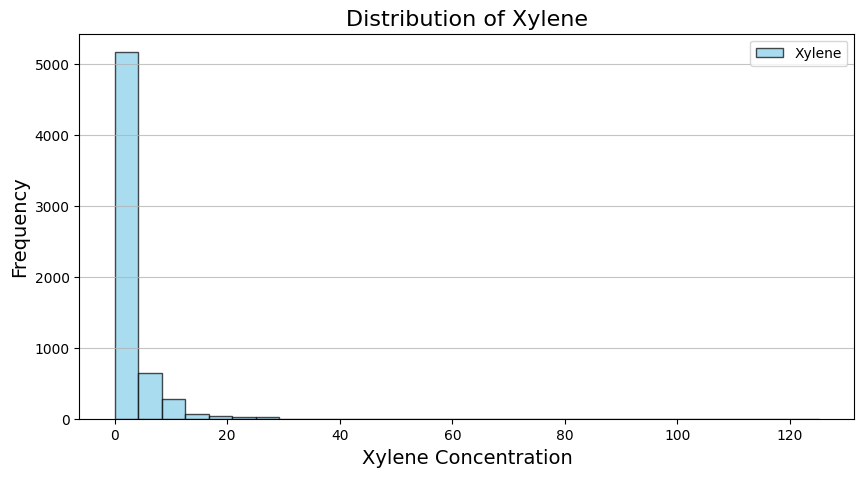

In [19]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['Xylene'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of Xylene', fontsize=16)
plt.xlabel('Xylene Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['Xylene'], loc='upper right')

# Show the plot
plt.show()

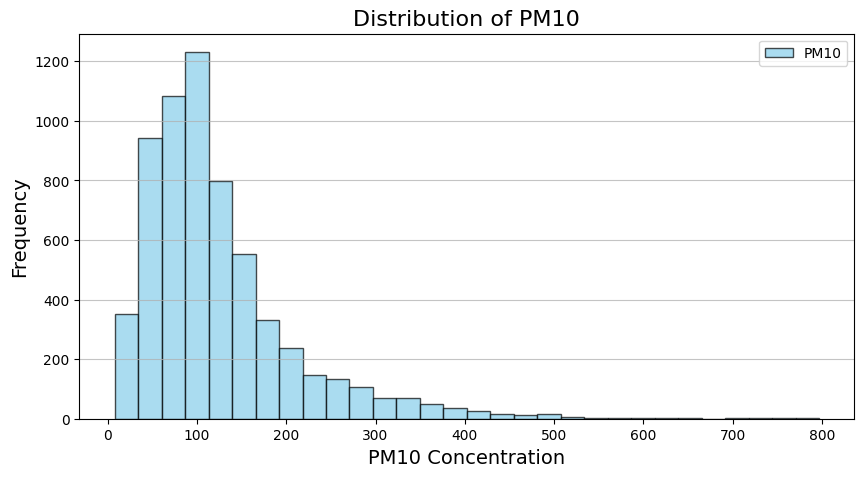

In [20]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['PM10'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of PM10', fontsize=16)
plt.xlabel('PM10 Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['PM10'], loc='upper right')

# Show the plot
plt.show()

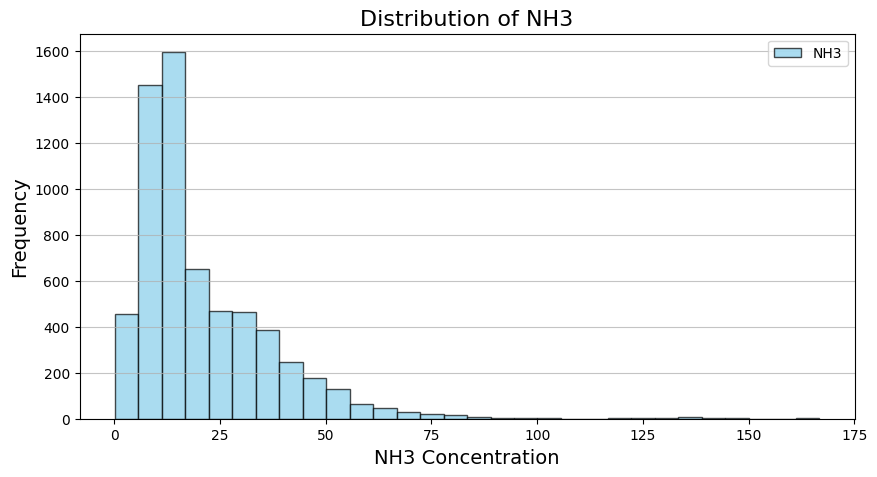

In [21]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['NH3'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of NH3', fontsize=16)
plt.xlabel('NH3 Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['NH3'], loc='upper right')

# Show the plot
plt.show()

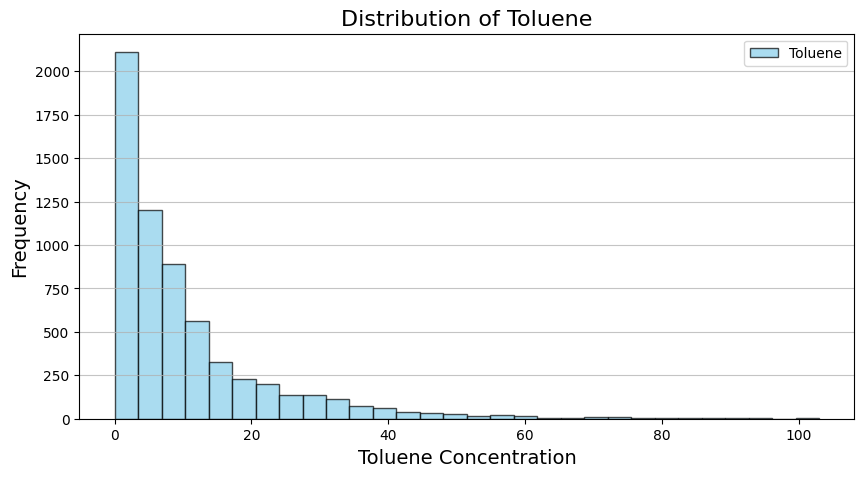

In [22]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['Toluene'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of Toluene', fontsize=16)
plt.xlabel('Toluene Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['Toluene'], loc='upper right')

# Show the plot
plt.show()

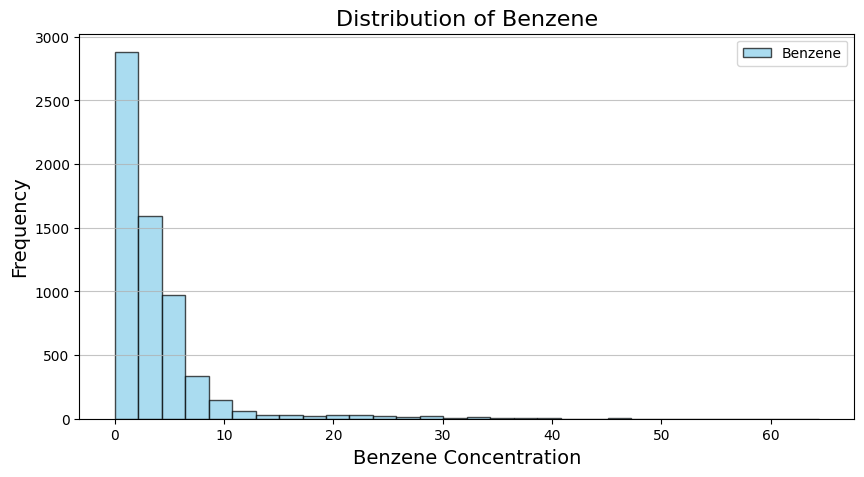

In [23]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['Benzene'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of Benzene', fontsize=16)
plt.xlabel('Benzene Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)
w
# Displaying the legend (if needed)
plt.legend(['Benzene'], loc='upper right')

# Show the plot
plt.show()

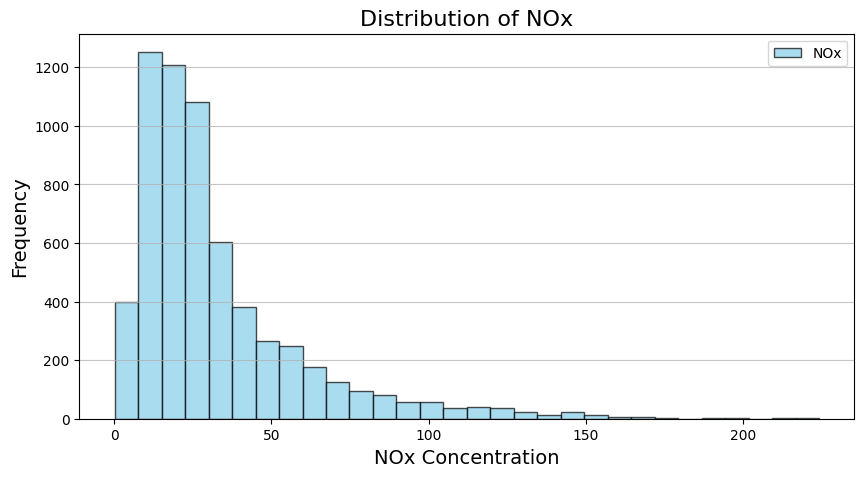

In [24]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['NOx'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of NOx', fontsize=16)
plt.xlabel('NOx Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['NOx'], loc='upper right')

# Show the plot
plt.show()

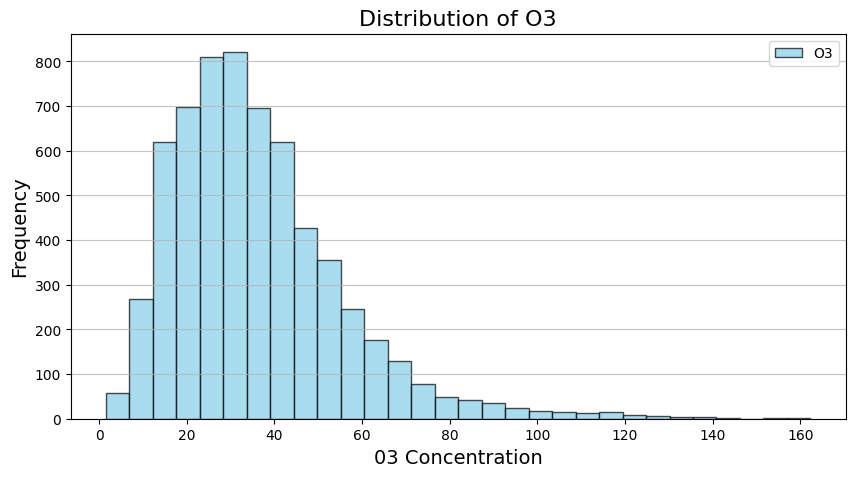

In [25]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['O3'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of O3', fontsize=16)
plt.xlabel('03 Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['O3'], loc='upper right')

# Show the plot
plt.show()

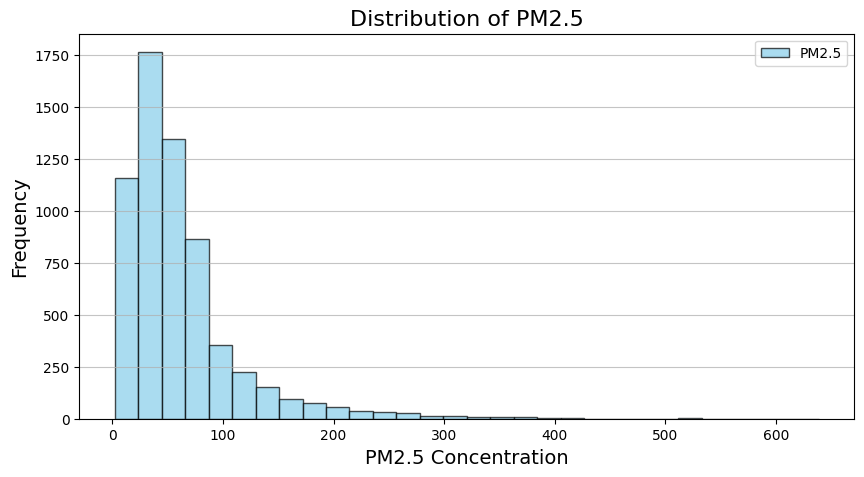

In [26]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['PM2.5'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of PM2.5', fontsize=16)
plt.xlabel('PM2.5 Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['PM2.5'], loc='upper right')

# Show the plot
plt.show()

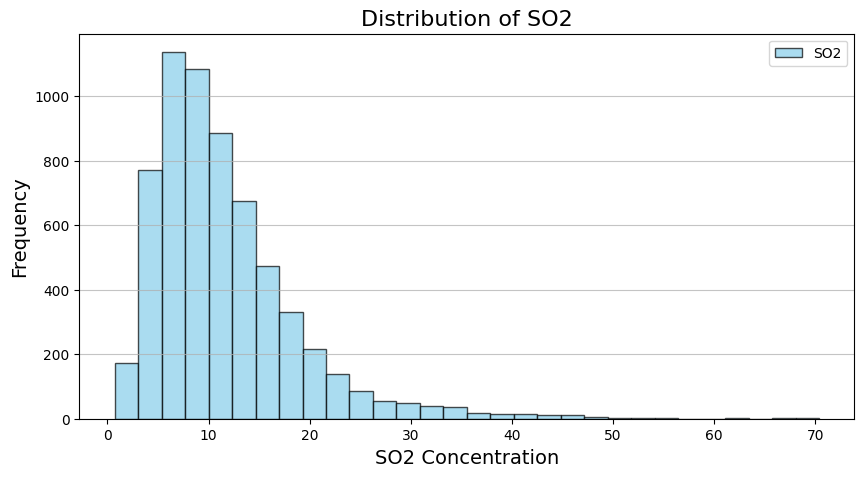

In [27]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['SO2'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of SO2', fontsize=16)
plt.xlabel('SO2 Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['SO2'], loc='upper right')

# Show the plot
plt.show()

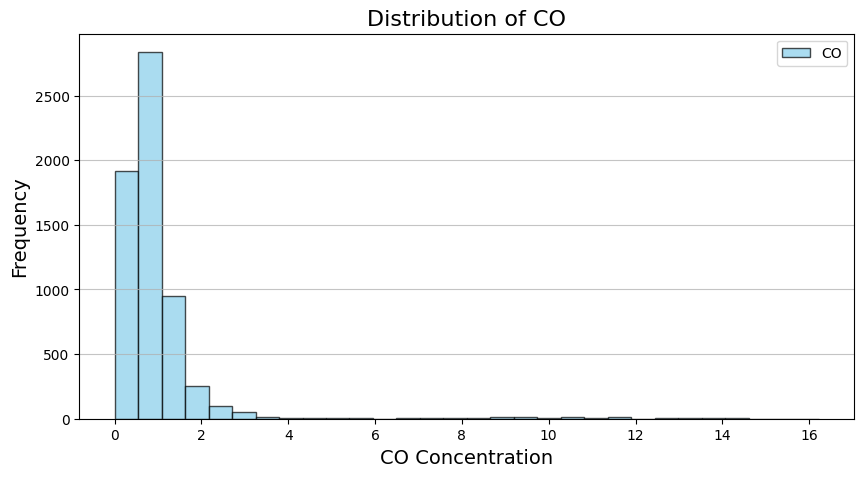

In [28]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['CO'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of CO', fontsize=16)
plt.xlabel('CO Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['CO'], loc='upper right')

# Show the plot
plt.show()

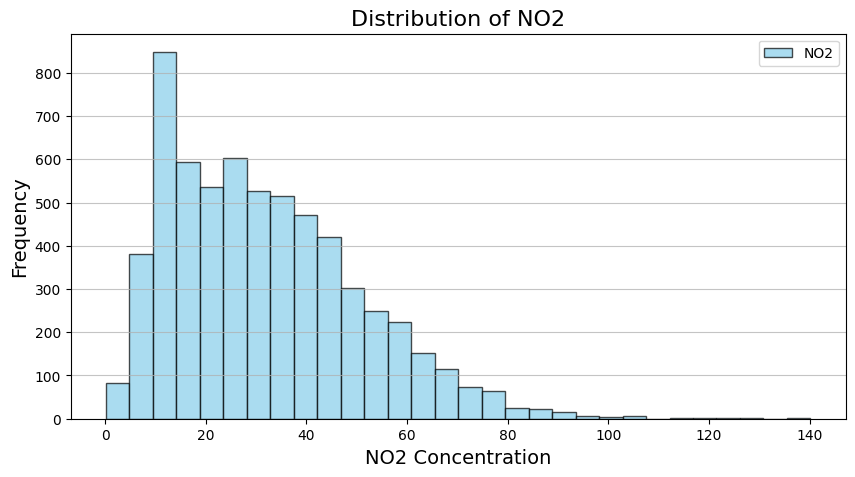

In [29]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['NO2'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of NO2', fontsize=16)
plt.xlabel('NO2 Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['NO2'], loc='upper right')

# Show the plot
plt.show()

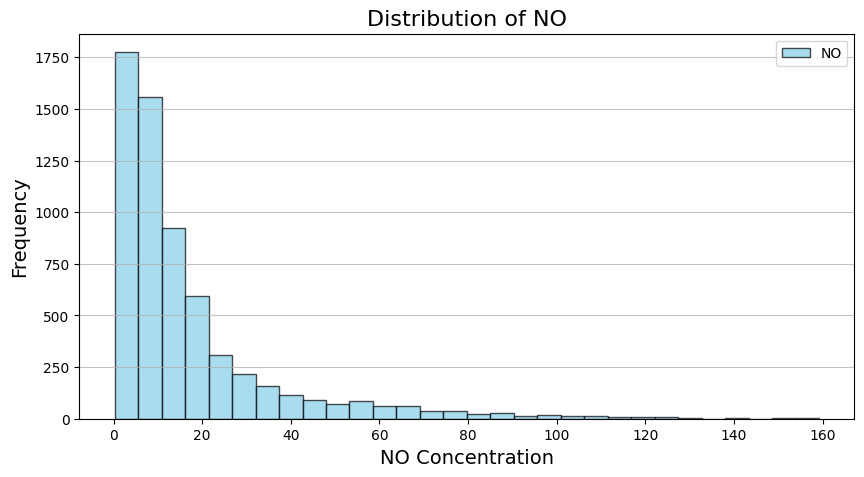

In [30]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['NO'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of NO', fontsize=16)
plt.xlabel('NO Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['NO'], loc='upper right')

# Show the plot
plt.show()

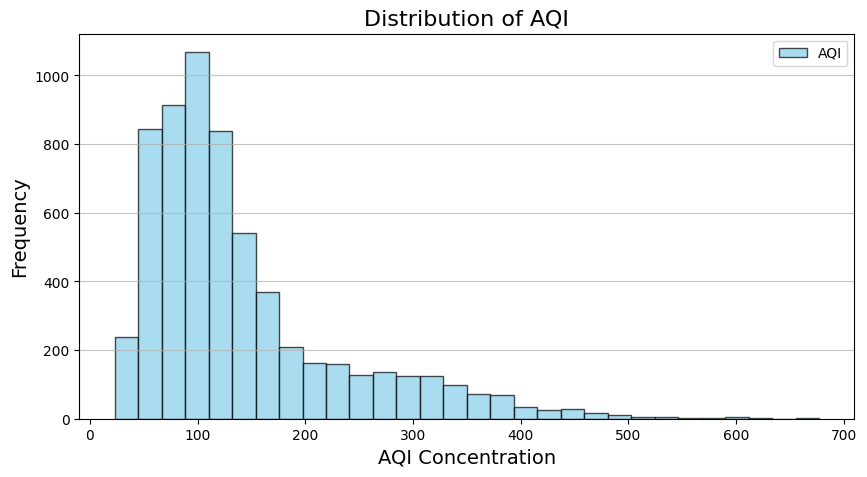

In [31]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['AQI'].plot(kind='hist', 
                  bins=30,  # Adjusting the number of bins for better granularity
                  color='skyblue',  # Changing the fill color
                  edgecolor='black',  # Adding edge color for better contrast
                  alpha=0.7)  # Setting transparency

# Adding titles and labels
plt.title('Distribution of AQI', fontsize=16)
plt.xlabel('AQI Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

# Displaying the legend (if needed)
plt.legend(['AQI'], loc='upper right')

# Show the plot
plt.show()

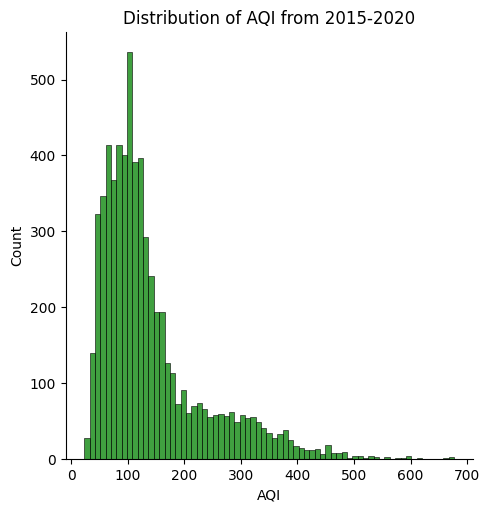

In [32]:
# Create the distribution plot with green color
sns.displot(df, x="AQI", color="green")  # Change "green" to any color you prefer

# Add title to the plot
plt.title("Distribution of AQI from 2015-2020")

# Show the plot
plt.show()

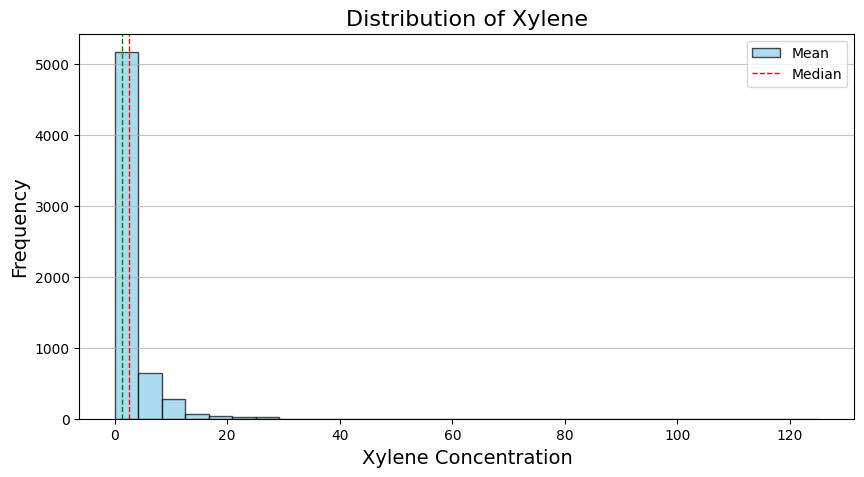

In [33]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Xylene'
plt.figure(figsize=(10, 5))
df['Xylene'].plot(kind='hist', 
                  bins=30,
                  color='skyblue',
                  edgecolor='black',
                  alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Xylene', fontsize=16)
plt.xlabel('Xylene Concentration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid and statistical lines
plt.grid(axis='y', alpha=0.75)
mean = df['Xylene'].mean()
median = df['Xylene'].median()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label='Median')

# Displaying the legend
plt.legend(['Mean', 'Median'], loc='upper right')

# Show the plot
plt.show()

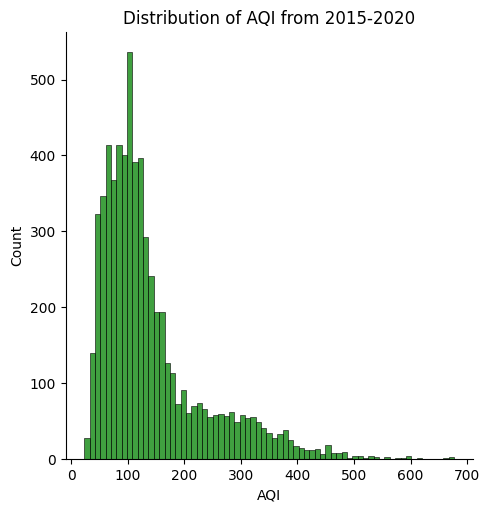

In [34]:
# Create the distribution plot with green color
sns.displot(df, x="AQI", color="green")  # Change "green" to any color you prefer

# Add title to the plot
plt.title("Distribution of AQI from 2015-2020")

# Show the plot
plt.show()

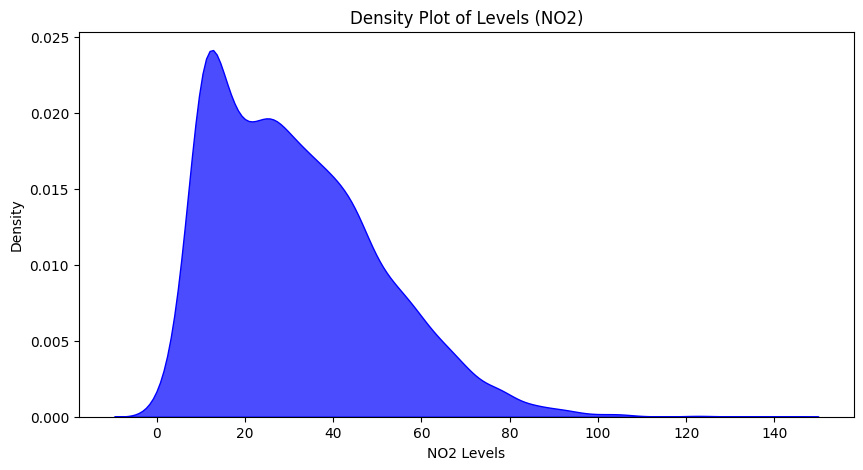

In [35]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['NO2'], fill=True, color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Density Plot of Levels (NO2)')
plt.xlabel('NO2 Levels')
plt.ylabel('Density')

# Display the plot
plt.show()

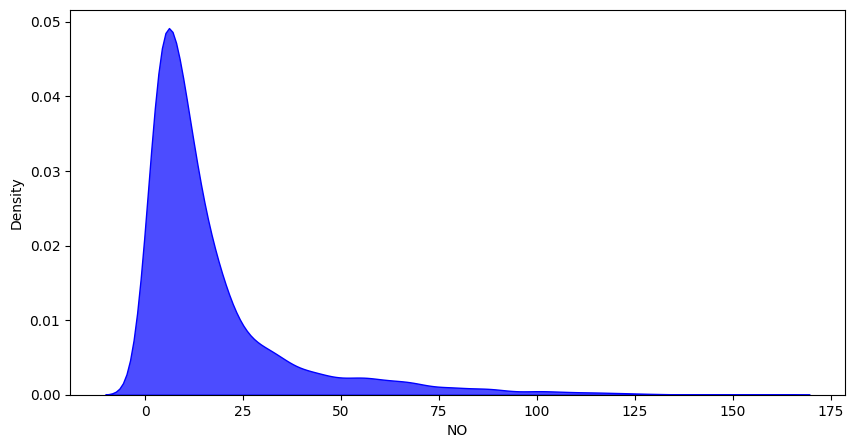

In [36]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['NO'], fill=True, color='blue', alpha=0.7)
plt.show()

<Axes: xlabel='Xylene', ylabel='Density'>

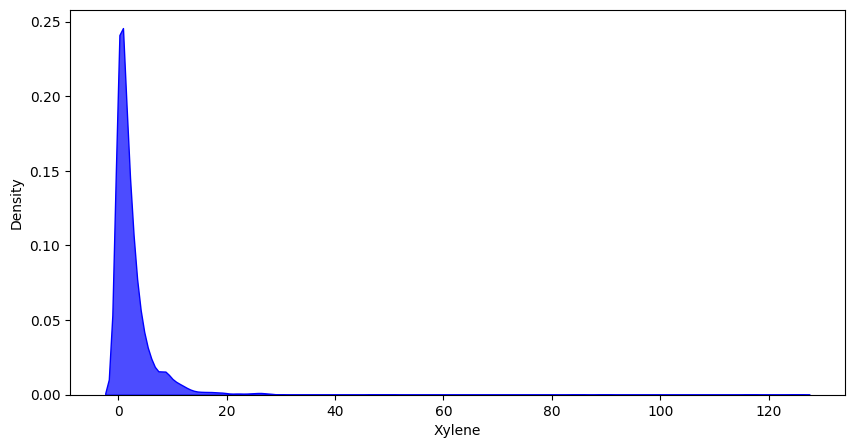

In [37]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Xylene'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='PM10', ylabel='Density'>

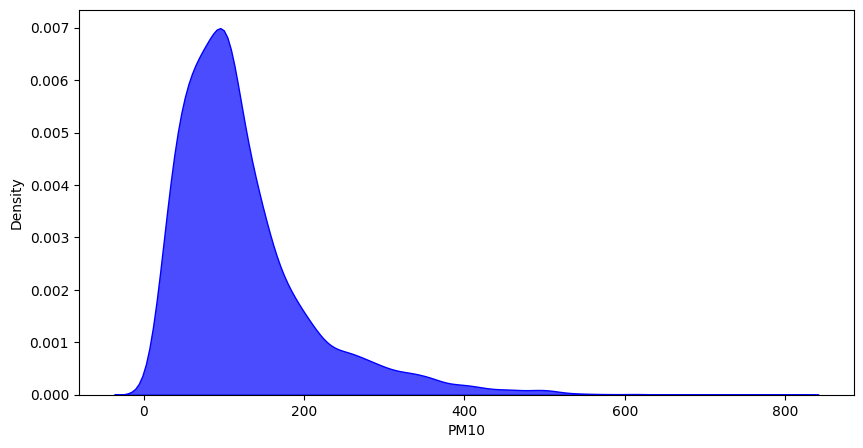

In [38]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['PM10'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='NH3', ylabel='Density'>

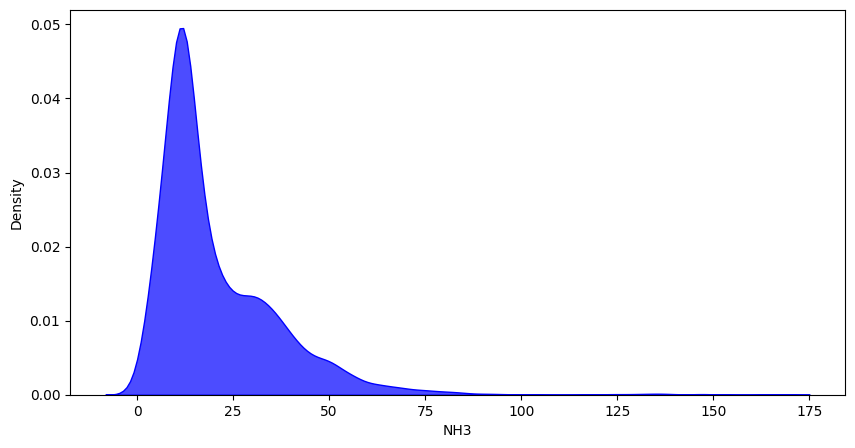

In [39]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['NH3'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='Benzene', ylabel='Density'>

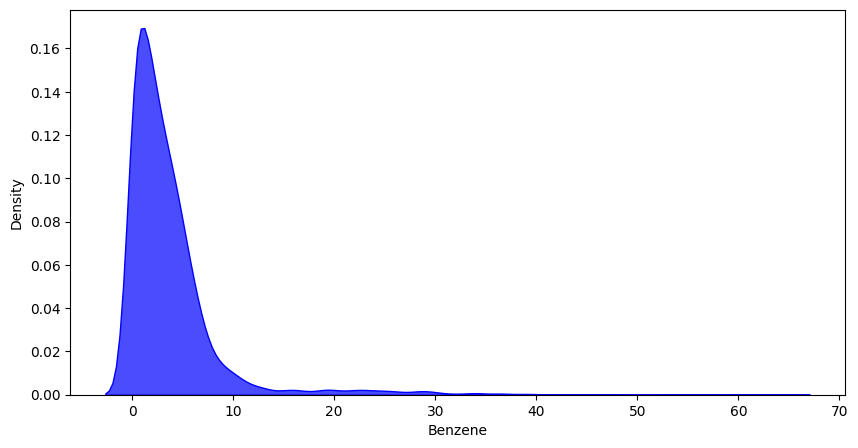

In [40]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Benzene'], fill=True, color='blue', alpha=0.7)

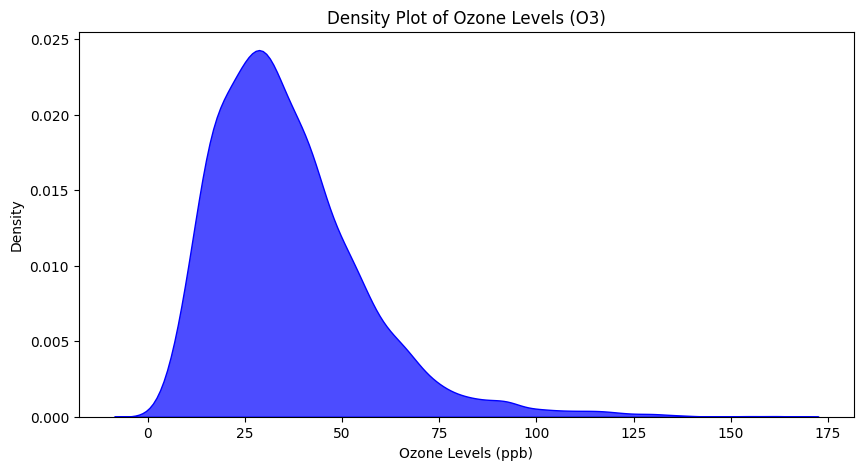

In [41]:

# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['O3'], fill=True, color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Density Plot of Ozone Levels (O3)')
plt.xlabel('Ozone Levels (ppb)')
plt.ylabel('Density')

# Display the plot
plt.show()

<Axes: xlabel='NOx', ylabel='Density'>

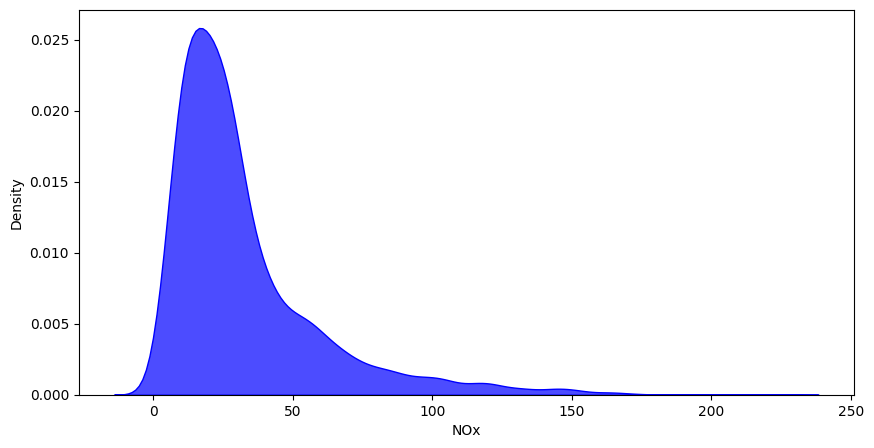

In [42]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['NOx'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='PM2.5', ylabel='Density'>

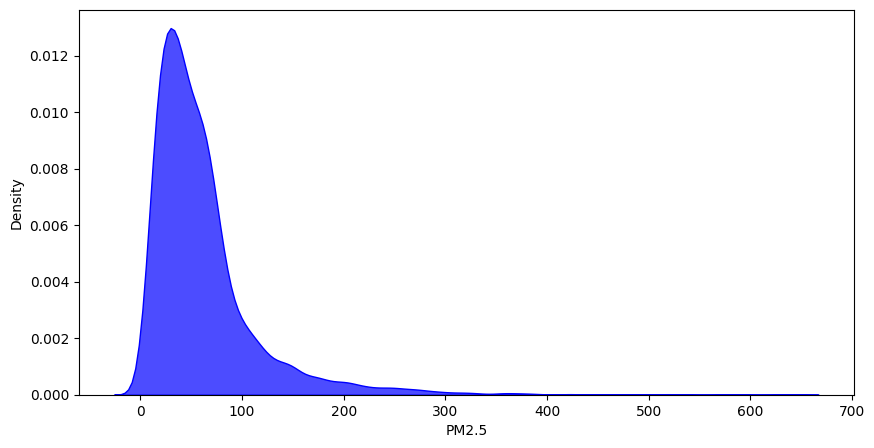

In [43]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['PM2.5'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='SO2', ylabel='Density'>

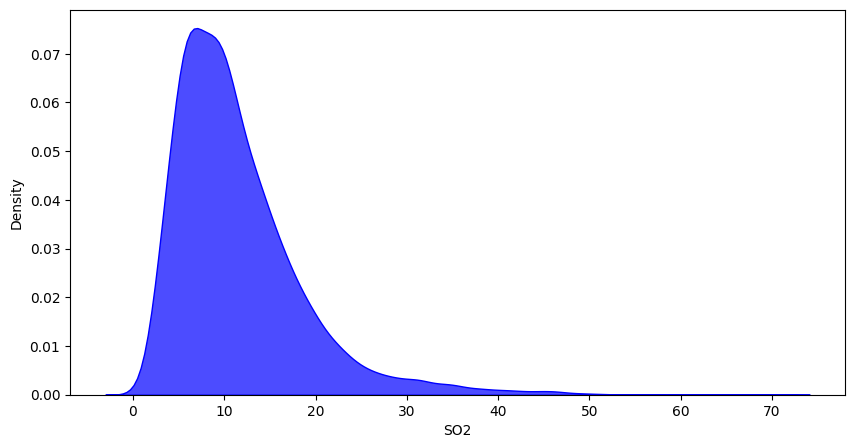

In [44]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['SO2'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='CO', ylabel='Density'>

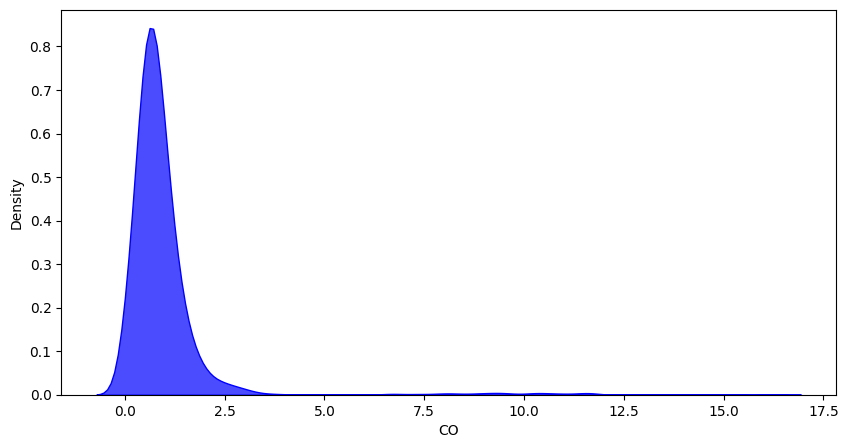

In [45]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['CO'], fill=True, color='blue', alpha=0.7)

<Axes: xlabel='AQI', ylabel='Density'>

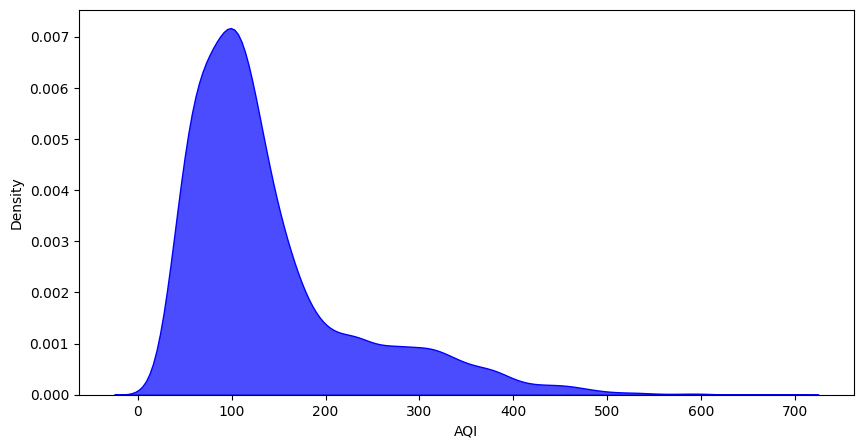

In [46]:
# Plotting the density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['AQI'], fill=True, color='blue', alpha=0.7)

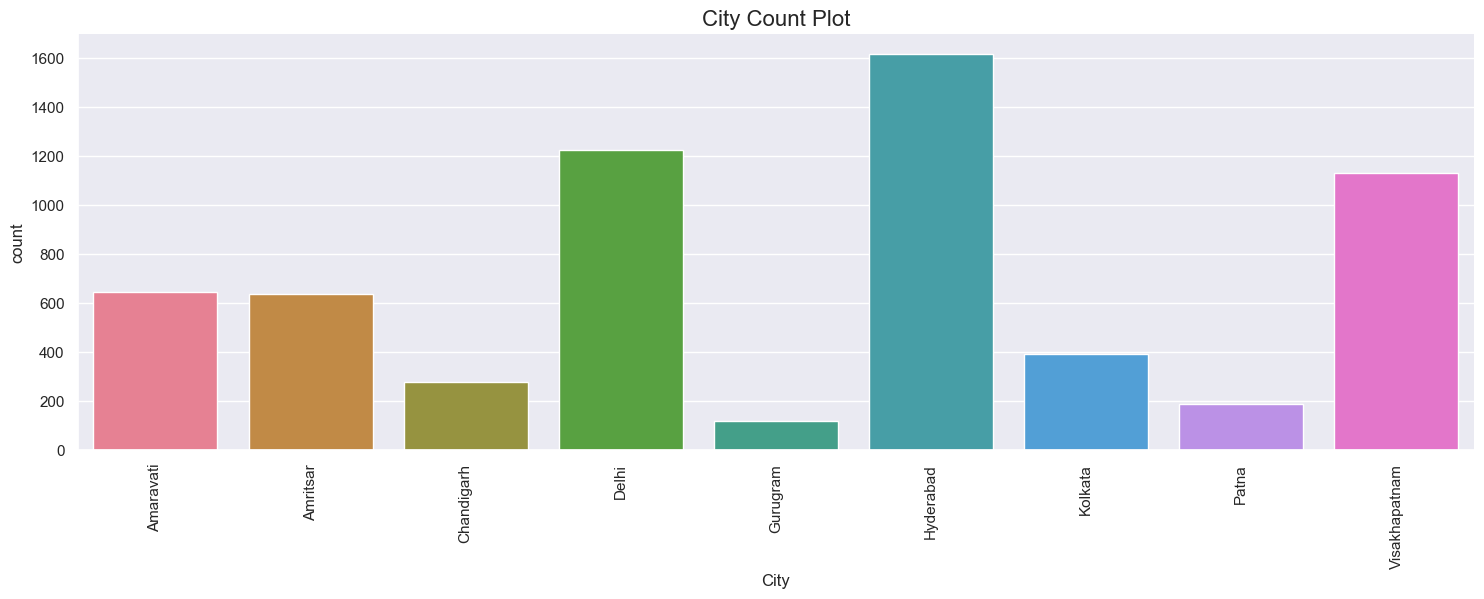

In [47]:
sns.set(style="darkgrid")  # Set darkgrid style

graph = sns.catplot(
    x="City",
    kind="count",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign `City` to `hue` to comply with the warning
    legend=False,  # Disable legend as it's unnecessary for this plot
    palette="husl"  # Use the 'husl' palette for vibrant colors
)

graph.set_xticklabels(rotation=90)  # Rotate x-axis labels for clarity
plt.title("City Count Plot", fontsize=16)  # Add a title
plt.show()


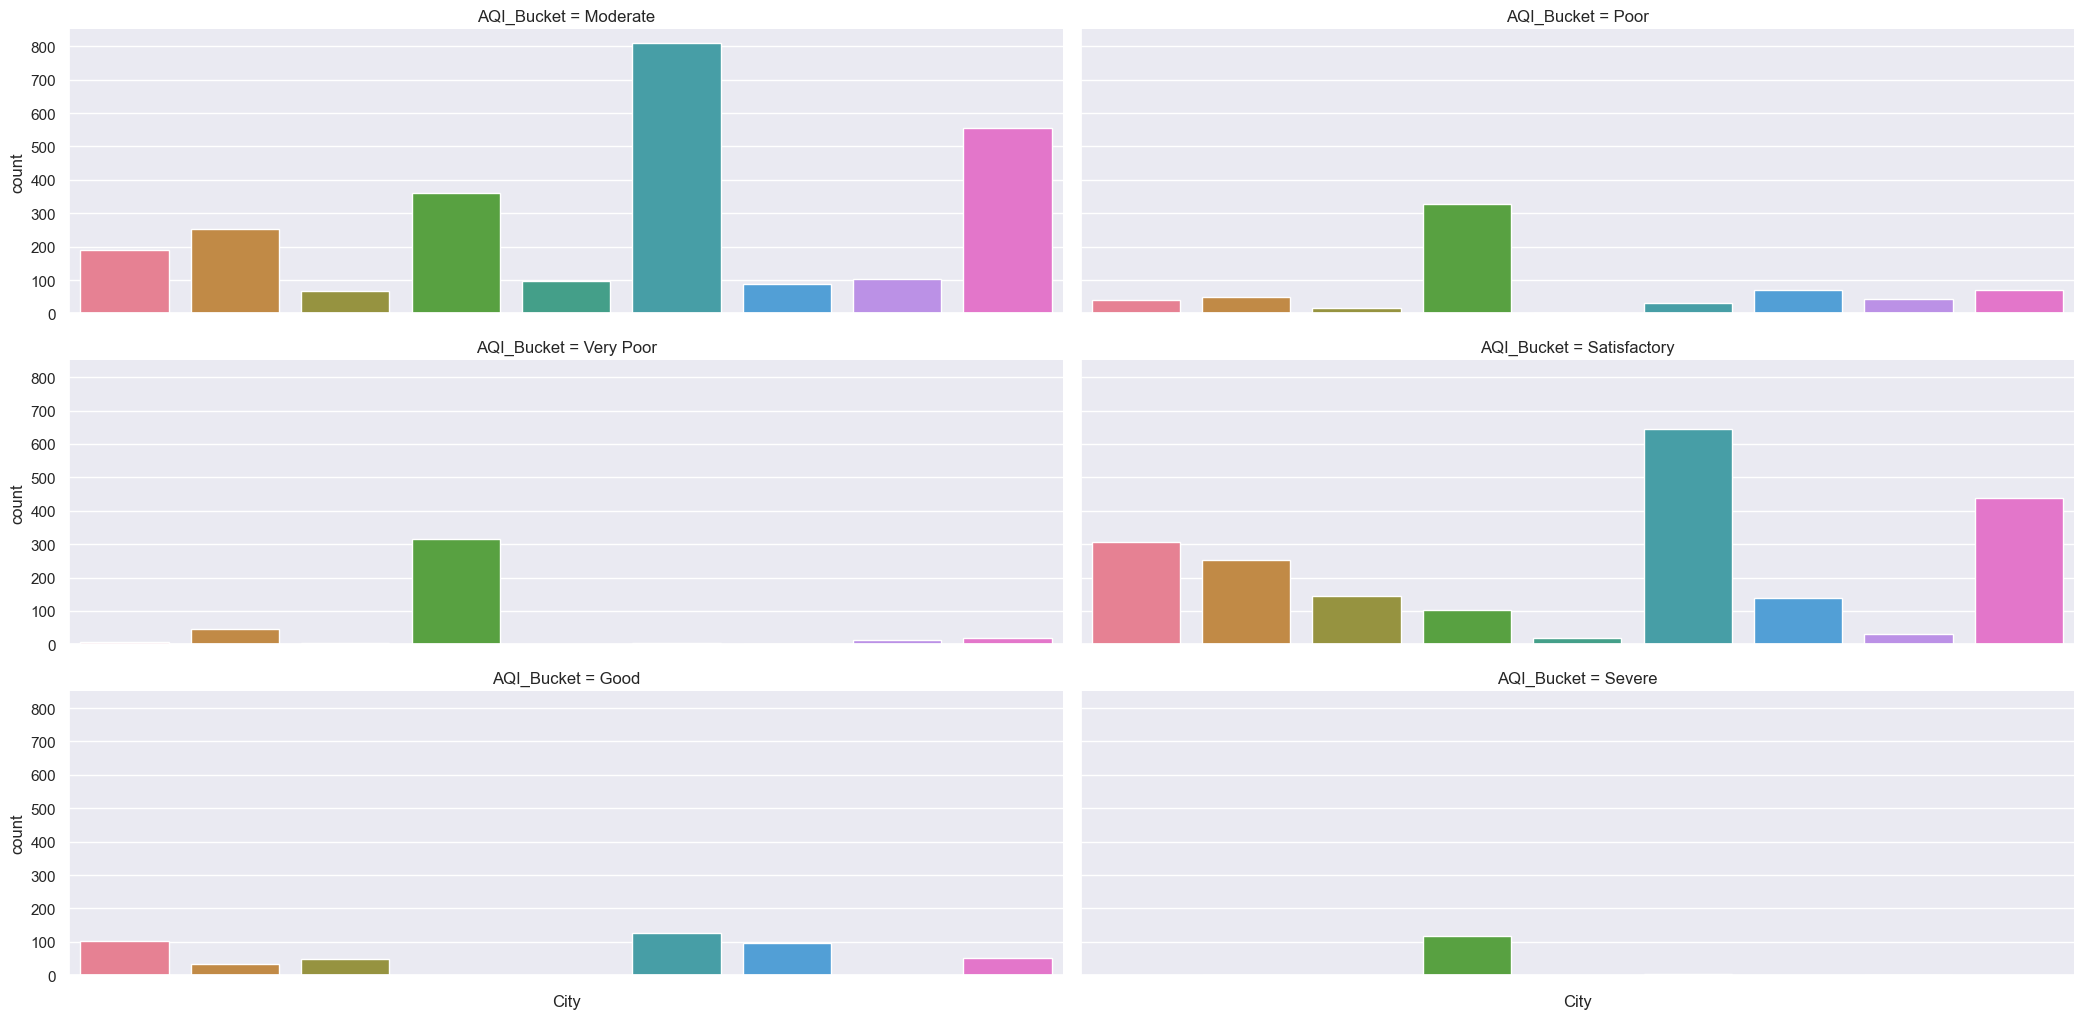

In [48]:
# Ensure the Seaborn style matches your preferences
sns.set(style="darkgrid")

# Generate a unique color for each city
unique_cities = df['City'].unique()  # Get unique city names
palette = dict(zip(unique_cities, sns.color_palette("husl", len(unique_cities))))  # Map each city to a unique color

# Create the plot with facets based on "AQI_Bucket"
graph = sns.catplot(
    x="City",
    kind="count",
    data=df,
    col="AQI_Bucket",
    col_wrap=2,
    height=3.5,
    aspect=3,
    hue="City",  # Assign `City` to `hue` to resolve the warning
    palette=palette,
    legend=False  # Suppress the legend since it’s redundant here
)

# Rotate x-axis labels for better readability
graph.set_xticklabels(rotation=90)

# Display the plot
plt.show()

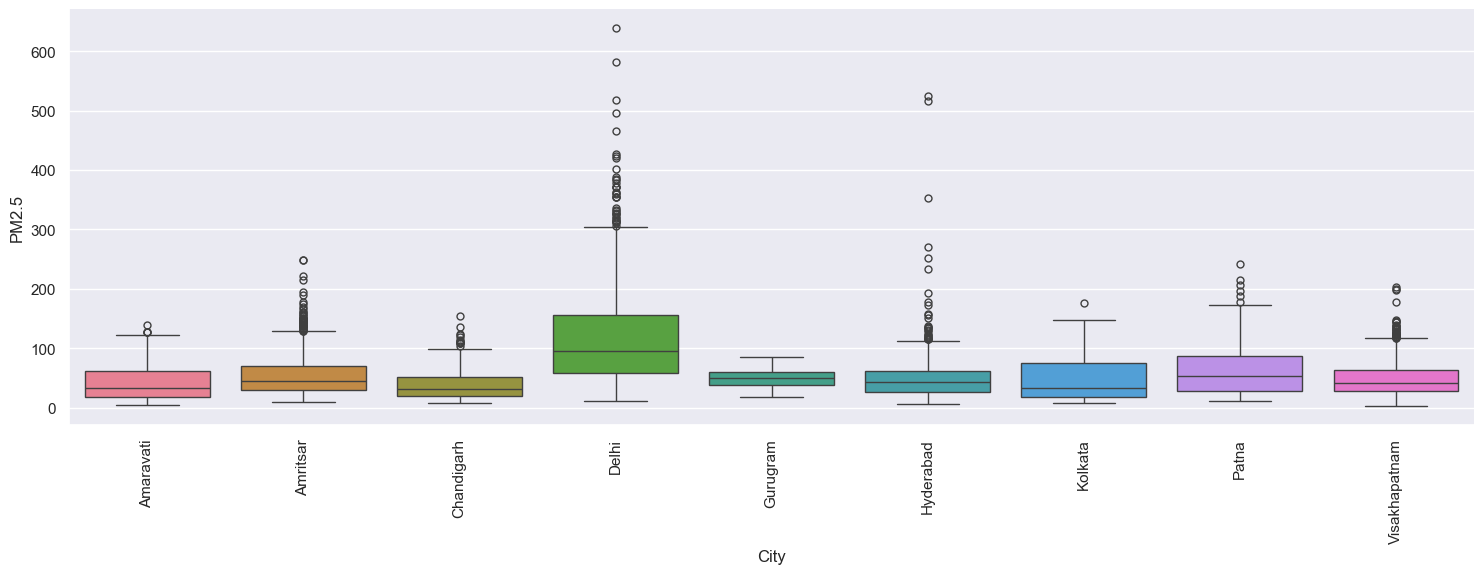

In [49]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a box plot with PM2.5 values for each city
graph1 = sns.catplot(
    x="City",
    y="PM2.5",
    kind="box",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign 'City' to hue to resolve the FutureWarning
    palette="husl",  # Assign a vibrant color palette
    legend=False  # Suppress the legend
)

# Rotate x-axis labels for better readability
graph1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

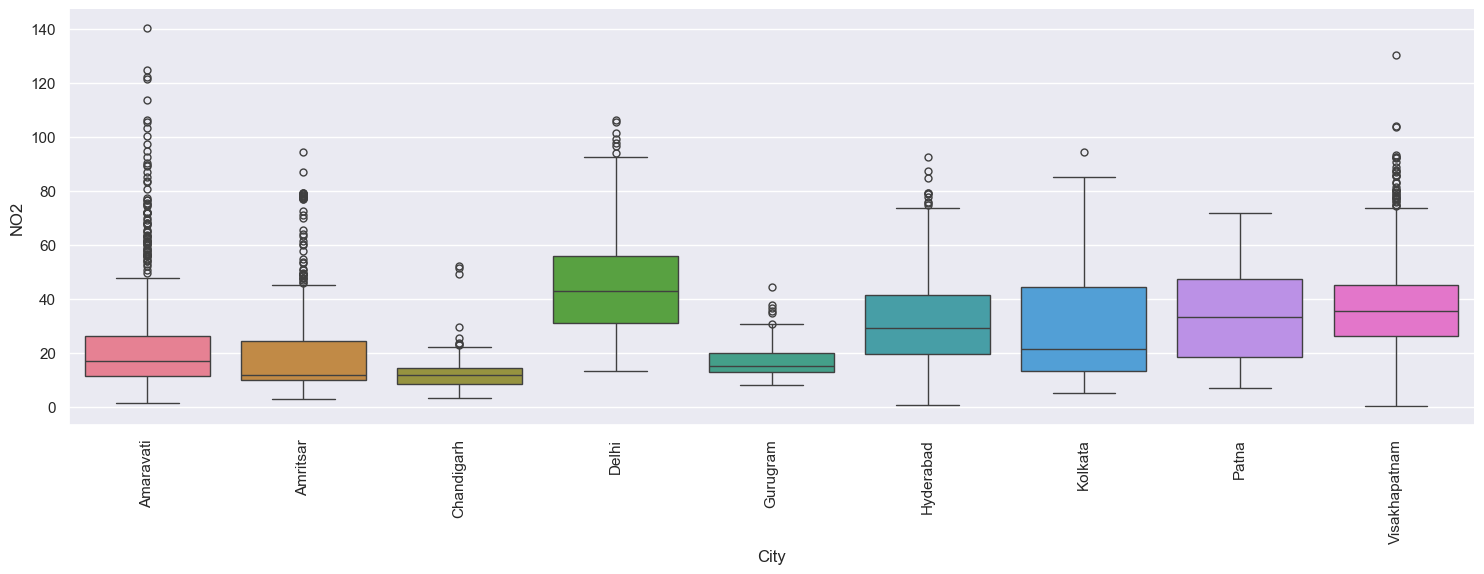

In [50]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a box plot with PM2.5 values for each city
graph1 = sns.catplot(
    x="City",
    y="NO2",
    kind="box",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign 'City' to hue to resolve the FutureWarning
    palette="husl",  # Assign a vibrant color palette
    legend=False  # Suppress the legend
)

# Rotate x-axis labels for better readability
graph1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

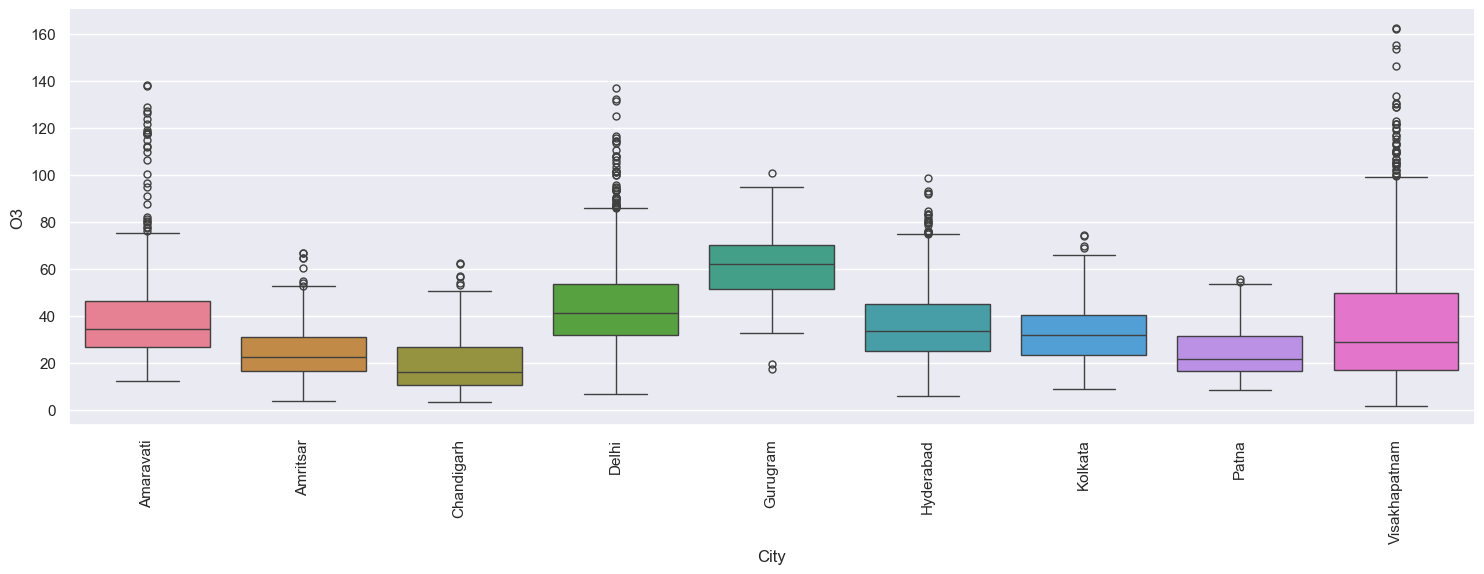

In [51]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a box plot with PM2.5 values for each city
graph1 = sns.catplot(
    x="City",
    y="O3",
    kind="box",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign 'City' to hue to resolve the FutureWarning
    palette="husl",  # Assign a vibrant color palette
    legend=False  # Suppress the legend
)

# Rotate x-axis labels for better readability
graph1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

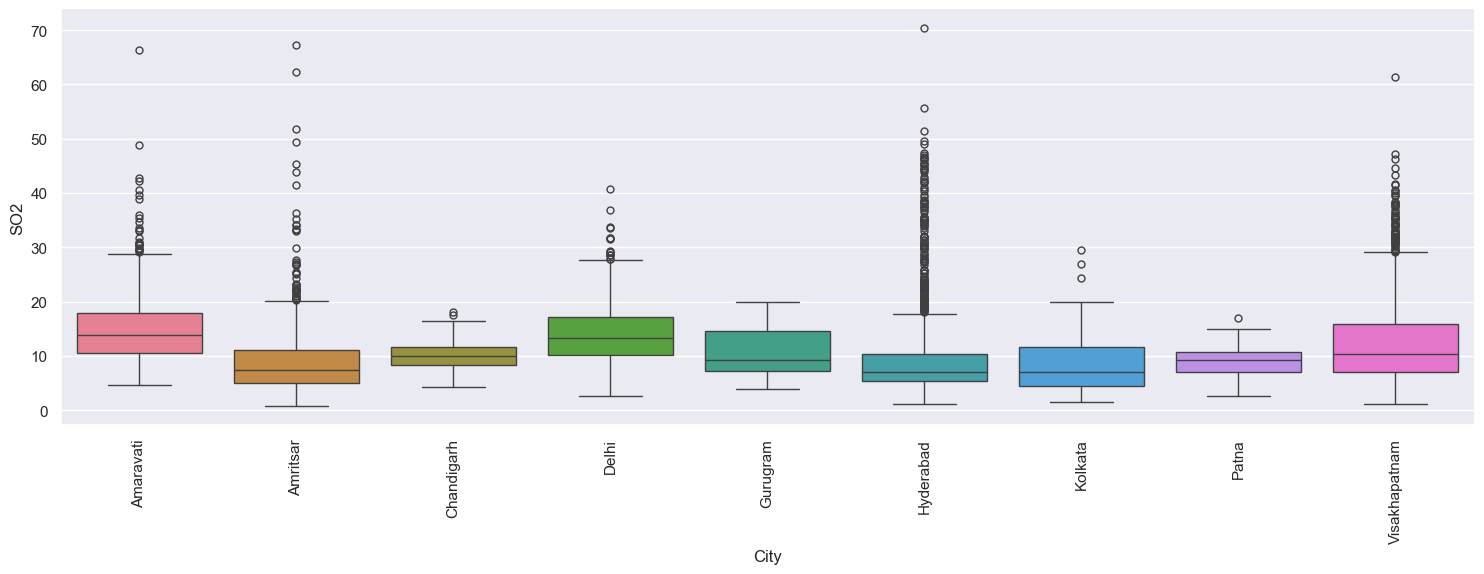

In [52]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a box plot with PM2.5 values for each city
graph1 = sns.catplot(
    x="City",
    y="SO2",
    kind="box",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign 'City' to hue to resolve the FutureWarning
    palette="husl",  # Assign a vibrant color palette
    legend=False  # Suppress the legend
)

# Rotate x-axis labels for better readability
graph1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

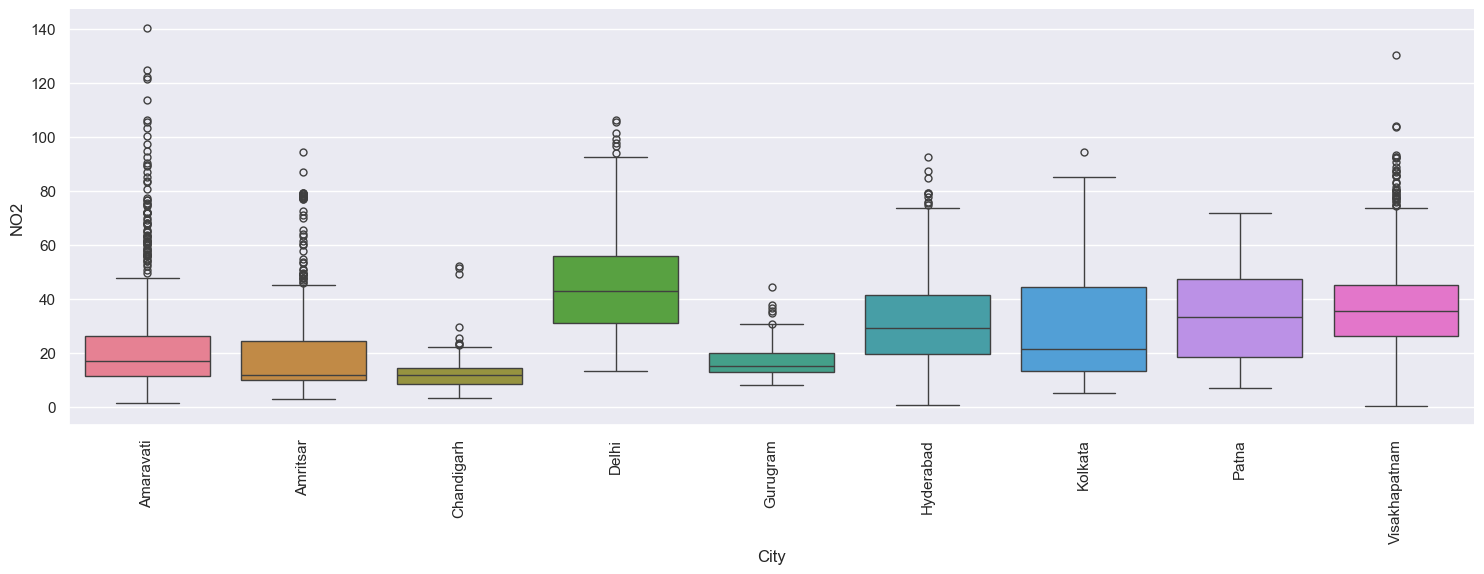

In [53]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a box plot with PM2.5 values for each city
graph1 = sns.catplot(
    x="City",
    y="NO2",
    kind="box",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign 'City' to hue to resolve the FutureWarning
    palette="husl",  # Assign a vibrant color palette
    legend=False  # Suppress the legend
)

# Rotate x-axis labels for better readability
graph1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

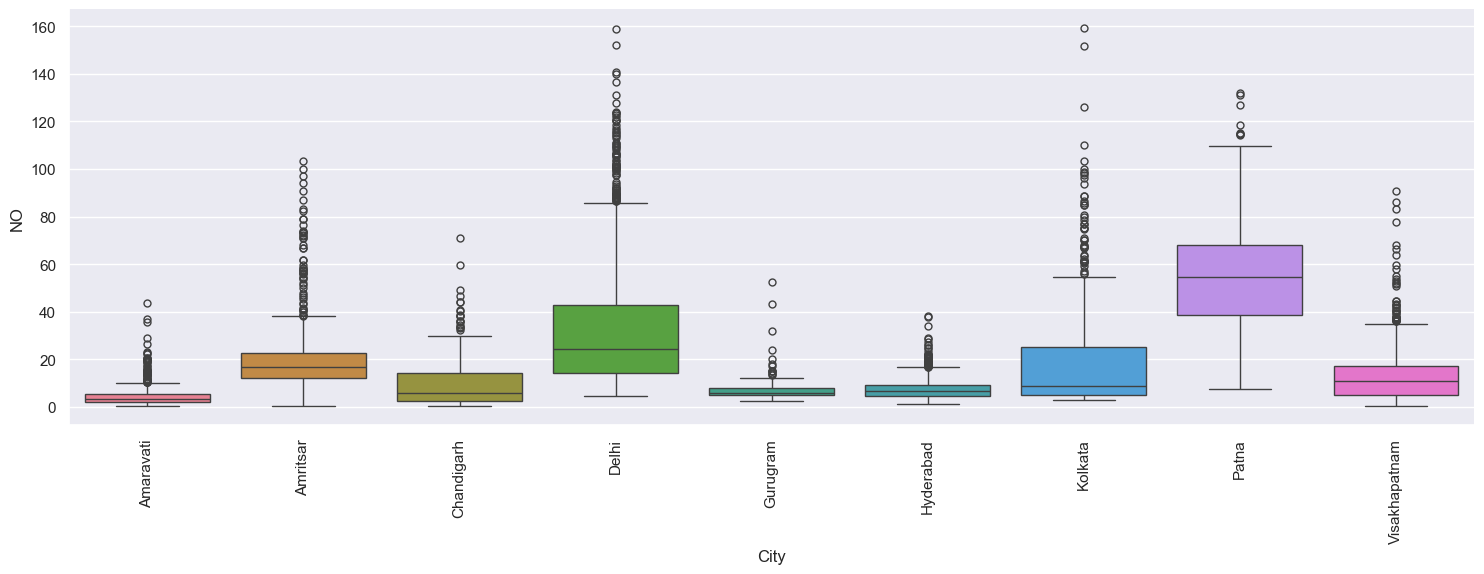

In [54]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a box plot with PM2.5 values for each city
graph1 = sns.catplot(
    x="City",
    y="NO",
    kind="box",
    data=df,
    height=5,
    aspect=3,
    hue="City",  # Assign 'City' to hue to resolve the FutureWarning
    palette="husl",  # Assign a vibrant color palette
    legend=False  # Suppress the legend
)

# Rotate x-axis labels for better readability
graph1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

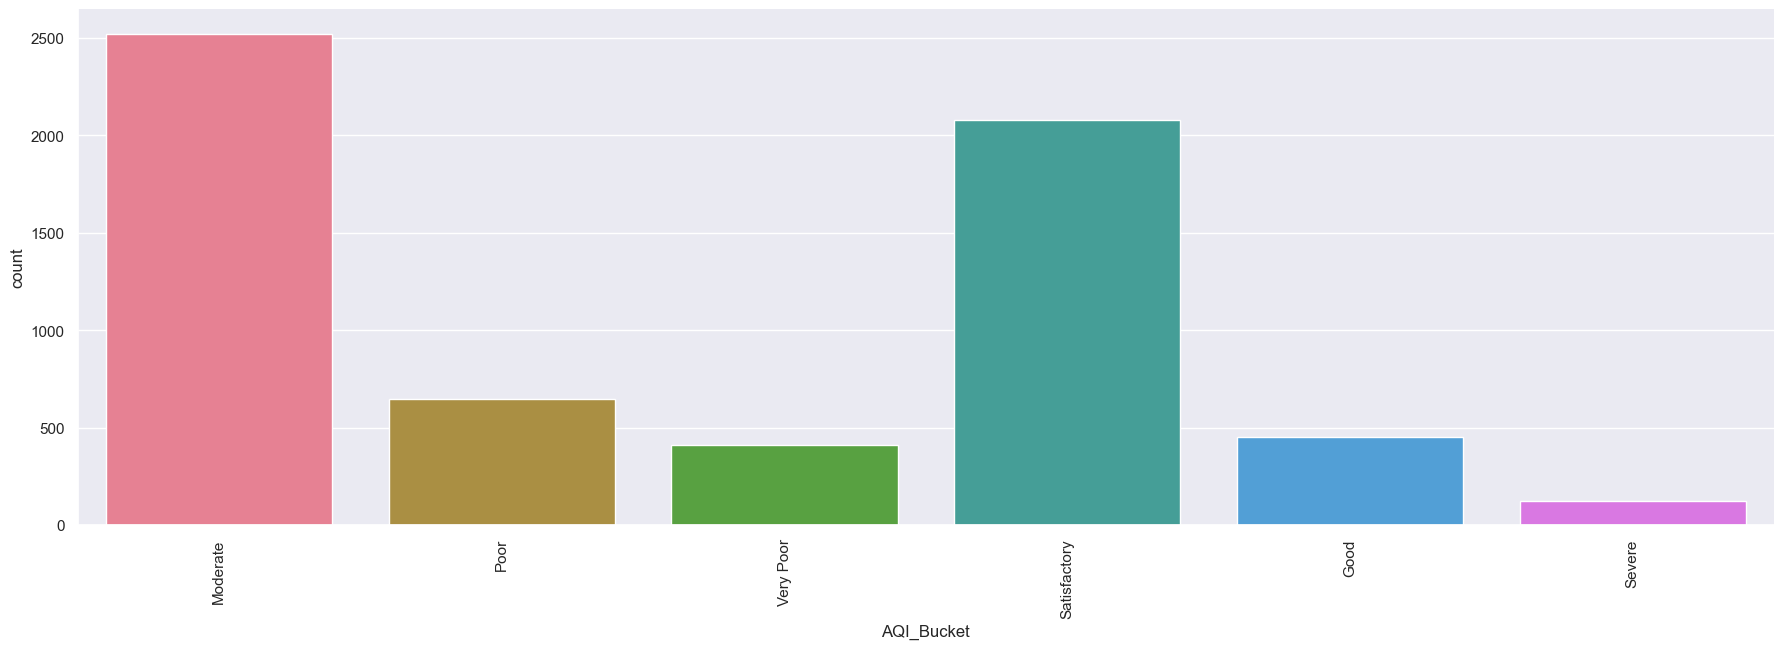

In [55]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a count plot with different colors for each AQI_Bucket
graph7 = sns.catplot(
    x="AQI_Bucket",
    data=df,
    kind="count",
    height=6,
    aspect=3,
    hue="AQI_Bucket",  # Assign 'AQI_Bucket' to hue to resolve the FutureWarning
    palette="husl",  # Apply a vibrant color palette
    legend=False  # Suppress the legend, as it's not needed
)

# Rotate x-axis labels for better readability
graph7.set_xticklabels(rotation=90)

# Show the plot
plt.show()

In [56]:
# Checking all null values

df.isnull().sum().sort_values(ascending=False)

# higher null values present in PM10 followed by NH3

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [57]:
df.describe().loc["mean"]

PM2.5       61.327365
PM10       123.418321
NO          17.015191
NO2         31.708190
NOx         32.448956
NH3         20.737070
CO           0.984344
SO2         11.514426
O3          36.127691
Benzene      3.700361
Toluene     10.323696
Xylene       2.557439
AQI        140.510103
Name: mean, dtype: float64

In [58]:
#percentage of null values by column
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage.sort_values(ascending=False))

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64


In [59]:
#count of null values by column
null_counts = df.isnull().sum()
print(null_counts)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [60]:
#dropping columns with high null values
threshold = 0.5  # Set threshold for dropping columns (50% null values)
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

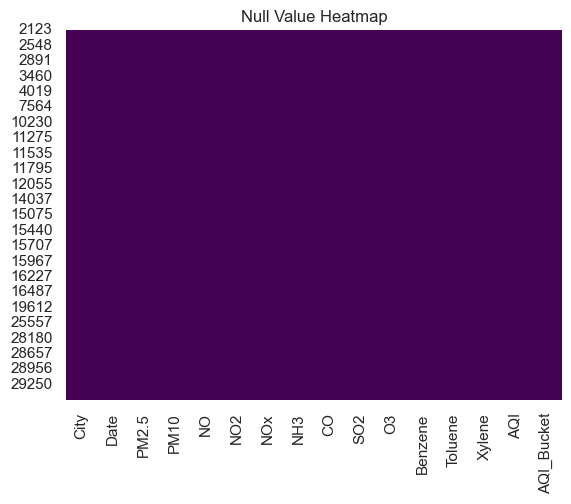

(None,)

In [61]:
#Visualising null values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show(),

In [62]:
#identifying rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []


In [63]:
# Step 1: Create a sample DataFrame with NaN values
data = {
    "PM2.5": [np.nan, 50, 60],
    "PM10": [120, np.nan, 130],
    "NO": [np.nan, 20, 30],
    "NO2": [25, np.nan, 35],
    "NH3": [np.nan, np.nan, 40],
    "CO": [1, np.nan, 3],
    "SO2": [np.nan, 5, 6],     # Corrected from '502' to 'SO2'
    "O3": [10, np.nan, 12],    # Corrected from '03' to 'O3'
    "Benzene": [np.nan, 2, 3],
    "Toluene": [4, np.nan, 6],
    "Xylene": [np.nan, 1, 2]
}

df = pd.DataFrame(data)  # Step 2: Initialize the DataFrame

# Step 3: Replace NaN values with specified values
df.replace({
    "PM2.5": {np.nan: 67.476613},
    "PM10": {np.nan: 118.454435},
    "NO": {np.nan: 17.622421},
    "NO2": {np.nan: 28.978391},
    "NH3": {np.nan: 23.848366},
    "CO": {np.nan: 2.345267},
    "SO2": {np.nan: 34.912885},
    "O3": {np.nan: 38.320547},
    "Benzene": {np.nan: 3.458668},
    "Toluene": {np.nan: 9.525714},
    "Xylene": {np.nan: 3.588683}
}, inplace=True)

# Step 4: Print the updated DataFrame
print(df)

       PM2.5        PM10         NO        NO2        NH3        CO  \
0  67.476613  120.000000  17.622421  25.000000  23.848366  1.000000   
1  50.000000  118.454435  20.000000  28.978391  23.848366  2.345267   
2  60.000000  130.000000  30.000000  35.000000  40.000000  3.000000   

         SO2         O3   Benzene   Toluene    Xylene  
0  34.912885  10.000000  3.458668  4.000000  3.588683  
1   5.000000  38.320547  2.000000  9.525714  1.000000  
2   6.000000  12.000000  3.000000  6.000000  2.000000  


In [64]:
df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
dtype: int64

In [65]:
df = pd.read_csv("air quality data.csv")  # Replace with your actual file path


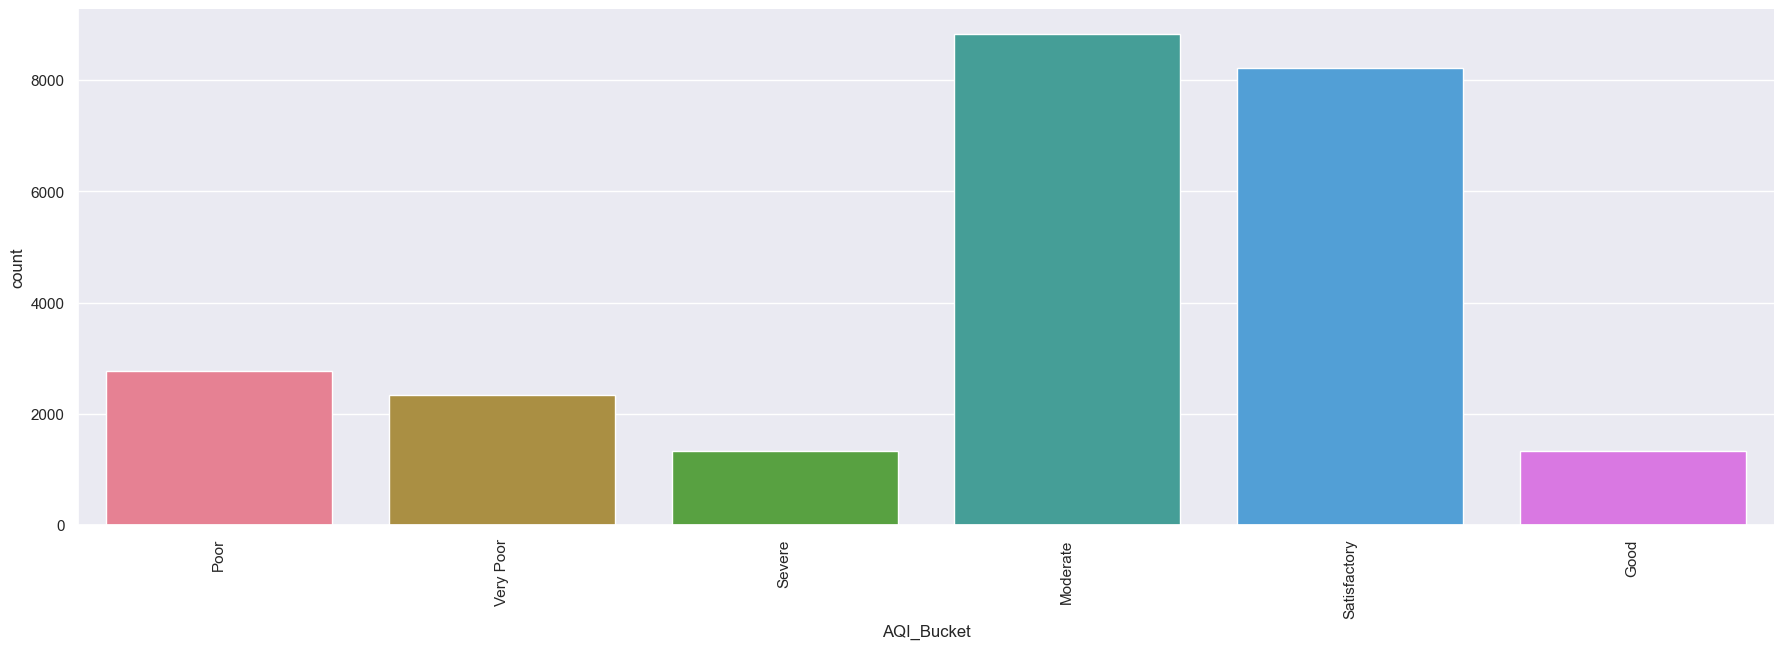

In [66]:
# Set the Seaborn style
sns.set(style="darkgrid")

# Create a count plot with different colors for each AQI_Bucket
graph7 = sns.catplot(
    x="AQI_Bucket",
    data=df,
    kind="count",
    height=6,
    aspect=3,
    hue="AQI_Bucket",  # Assign 'AQI_Bucket' to hue
    palette="husl",  # Vibrant color palette
    legend=False  # Suppress the legend if not needed
)

# Rotate x-axis labels for better readability
graph7.set_xticklabels(rotation=90)

# Show the plot
plt.show()


In [67]:
df = df.drop(["AQI_Bucket"], axis=1)

In [68]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI  
0  133.36     0.00     0.02    0.00  NaN  
1   34.06     3.68     5.50    3.77  NaN  
2   30.70     6.80    16.40    2.25  NaN  
3   36.08     4.43    10.14    1.00  NaN  
4   39.31     7.01    18.89    2.78  NaN

<Axes: >

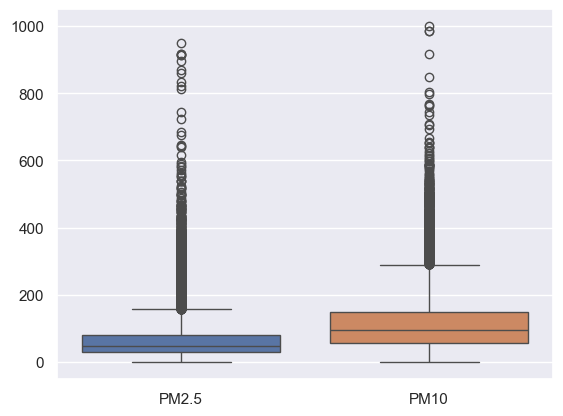

In [69]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

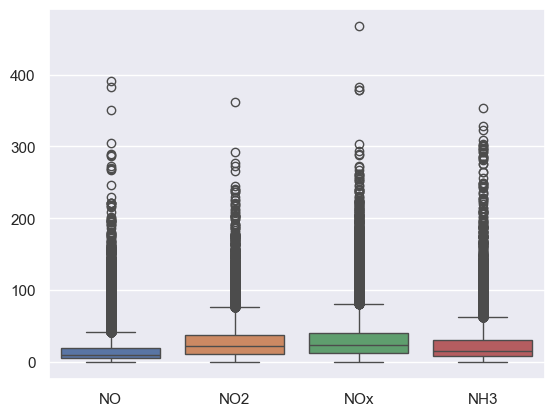

In [70]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']]) 

<Axes: >

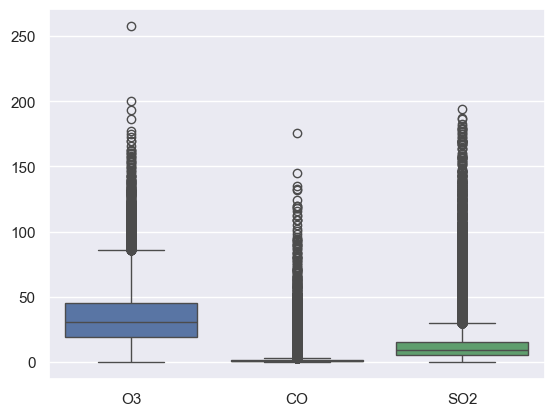

In [71]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

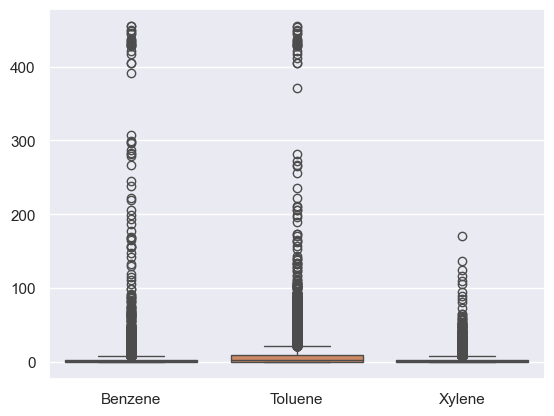

In [72]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

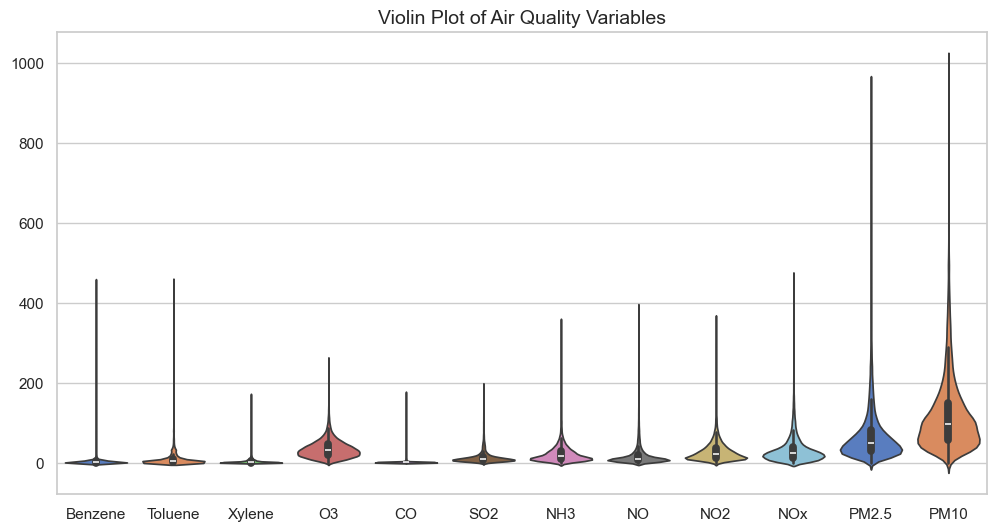

In [73]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Benzene', 'Toluene', 'Xylene', 'O3', 'CO', 'SO2', 'NH3', 'NO', 'NO2', 'NOx', 'PM2.5', 'PM10']],
               palette="muted")
plt.title("Violin Plot of Air Quality Variables", fontsize=14)
plt.show()


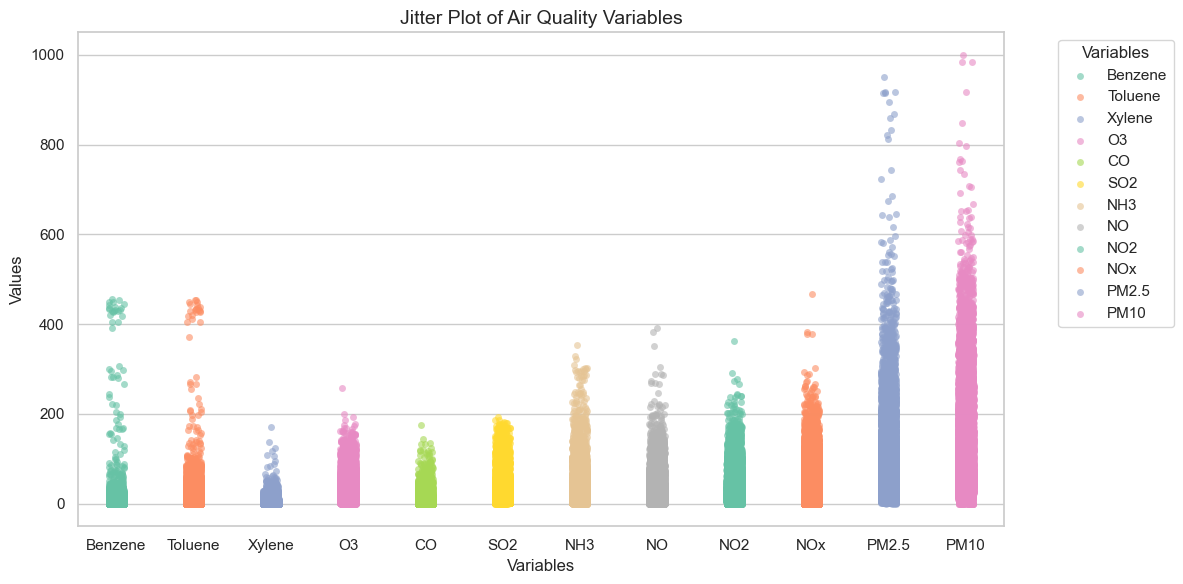

In [74]:
plt.figure(figsize=(12, 6))

# Define the variables and colors
variables = ['Benzene', 'Toluene', 'Xylene', 'O3', 'CO', 'SO2', 'NH3', 'NO', 'NO2', 'NOx', 'PM2.5', 'PM10']
colors = sns.color_palette("Set2", len(variables))

# Create the plot
for i, col in enumerate(variables):
    sns.stripplot(
        data=df,
        x=[col] * len(df),
        y=df[col],
        jitter=True,
        color=colors[i],  # Assign specific color
        alpha=0.6,
        label=col  # Add label for legend
    )

# Add title and adjust layout
plt.title("Jitter Plot of Air Quality Variables", fontsize=14)
plt.xticks(range(len(variables)), variables)
plt.xlabel("Variables")
plt.ylabel("Values")

# Move the legend to the right
plt.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


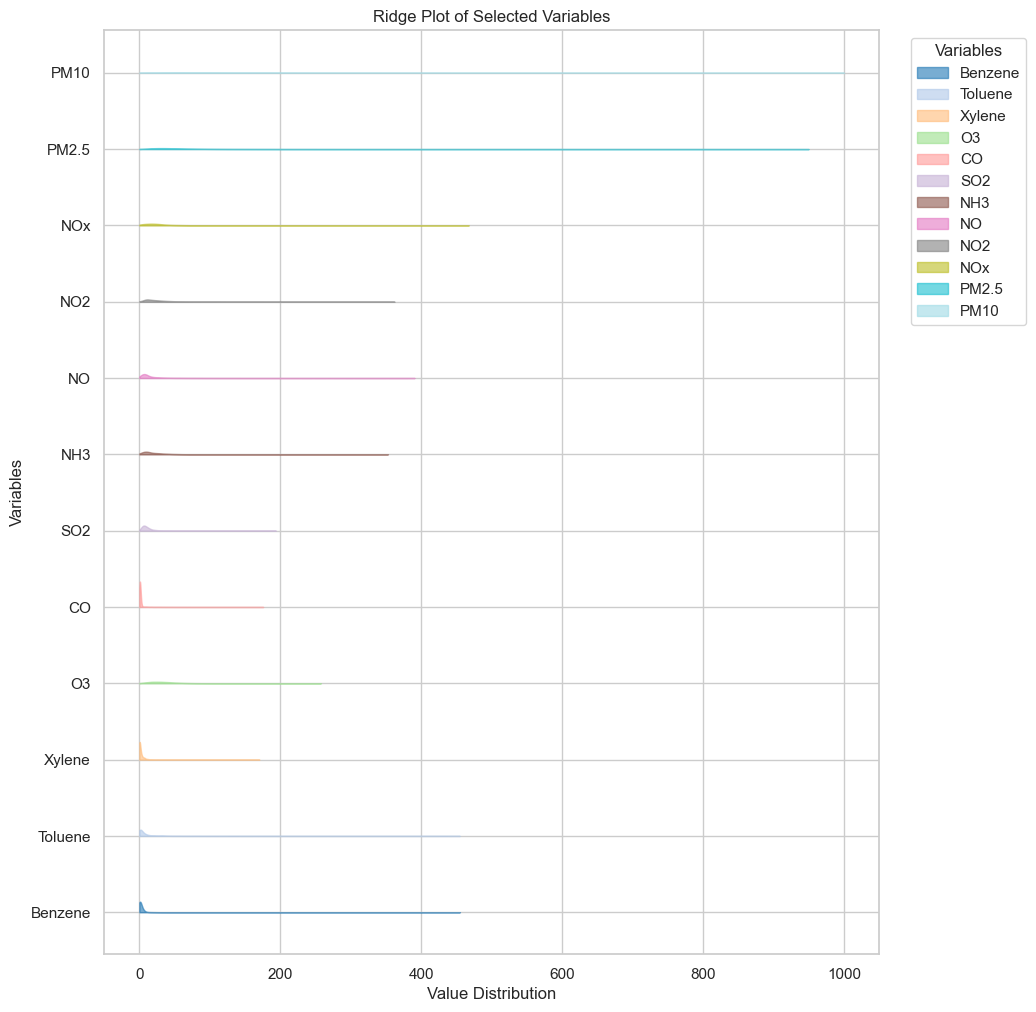

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Define the variables and colors
variables = ['Benzene', 'Toluene', 'Xylene', 'O3', 'CO', 'SO2', 'NH3', 'NO', 'NO2', 'NOx', 'PM2.5', 'PM10']
colors = plt.cm.tab20(np.linspace(0, 1, len(variables)))

# Set up the plot
plt.figure(figsize=(10, 12))

# Loop through each variable and create a ridge plot
for i, var in enumerate(variables):
    data = df[var].dropna()  # Remove NaN values for the current variable
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 1000)
    y = kde(x)
    
    # Adjust y-values for ridges to stack vertically
    plt.fill_between(x, i + y, i, color=colors[i], alpha=0.6, label=var)

# Customize the plot
plt.yticks(range(len(variables)), variables)
plt.xlabel("Value Distribution")
plt.ylabel("Variables")
plt.title("Ridge Plot of Selected Variables")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Variables")
plt.show()



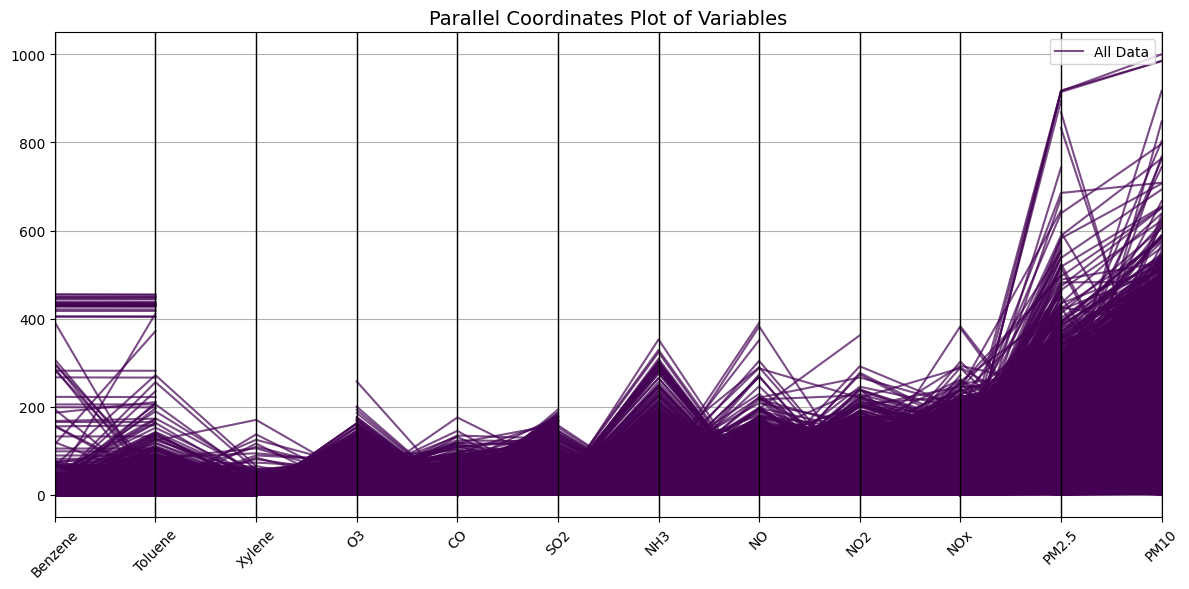

In [5]:
from pandas.plotting import parallel_coordinates

variables = ['Benzene', 'Toluene', 'Xylene', 'O3', 'CO', 'SO2', 'NH3', 'NO', 'NO2', 'NOx', 'PM2.5', 'PM10']

# Add category column to plot
df['Category'] = "All Data"

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df[variables + ['Category']], class_column='Category', colormap="viridis", alpha=0.7)

# Add labels and title
plt.title("Parallel Coordinates Plot of Variables", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


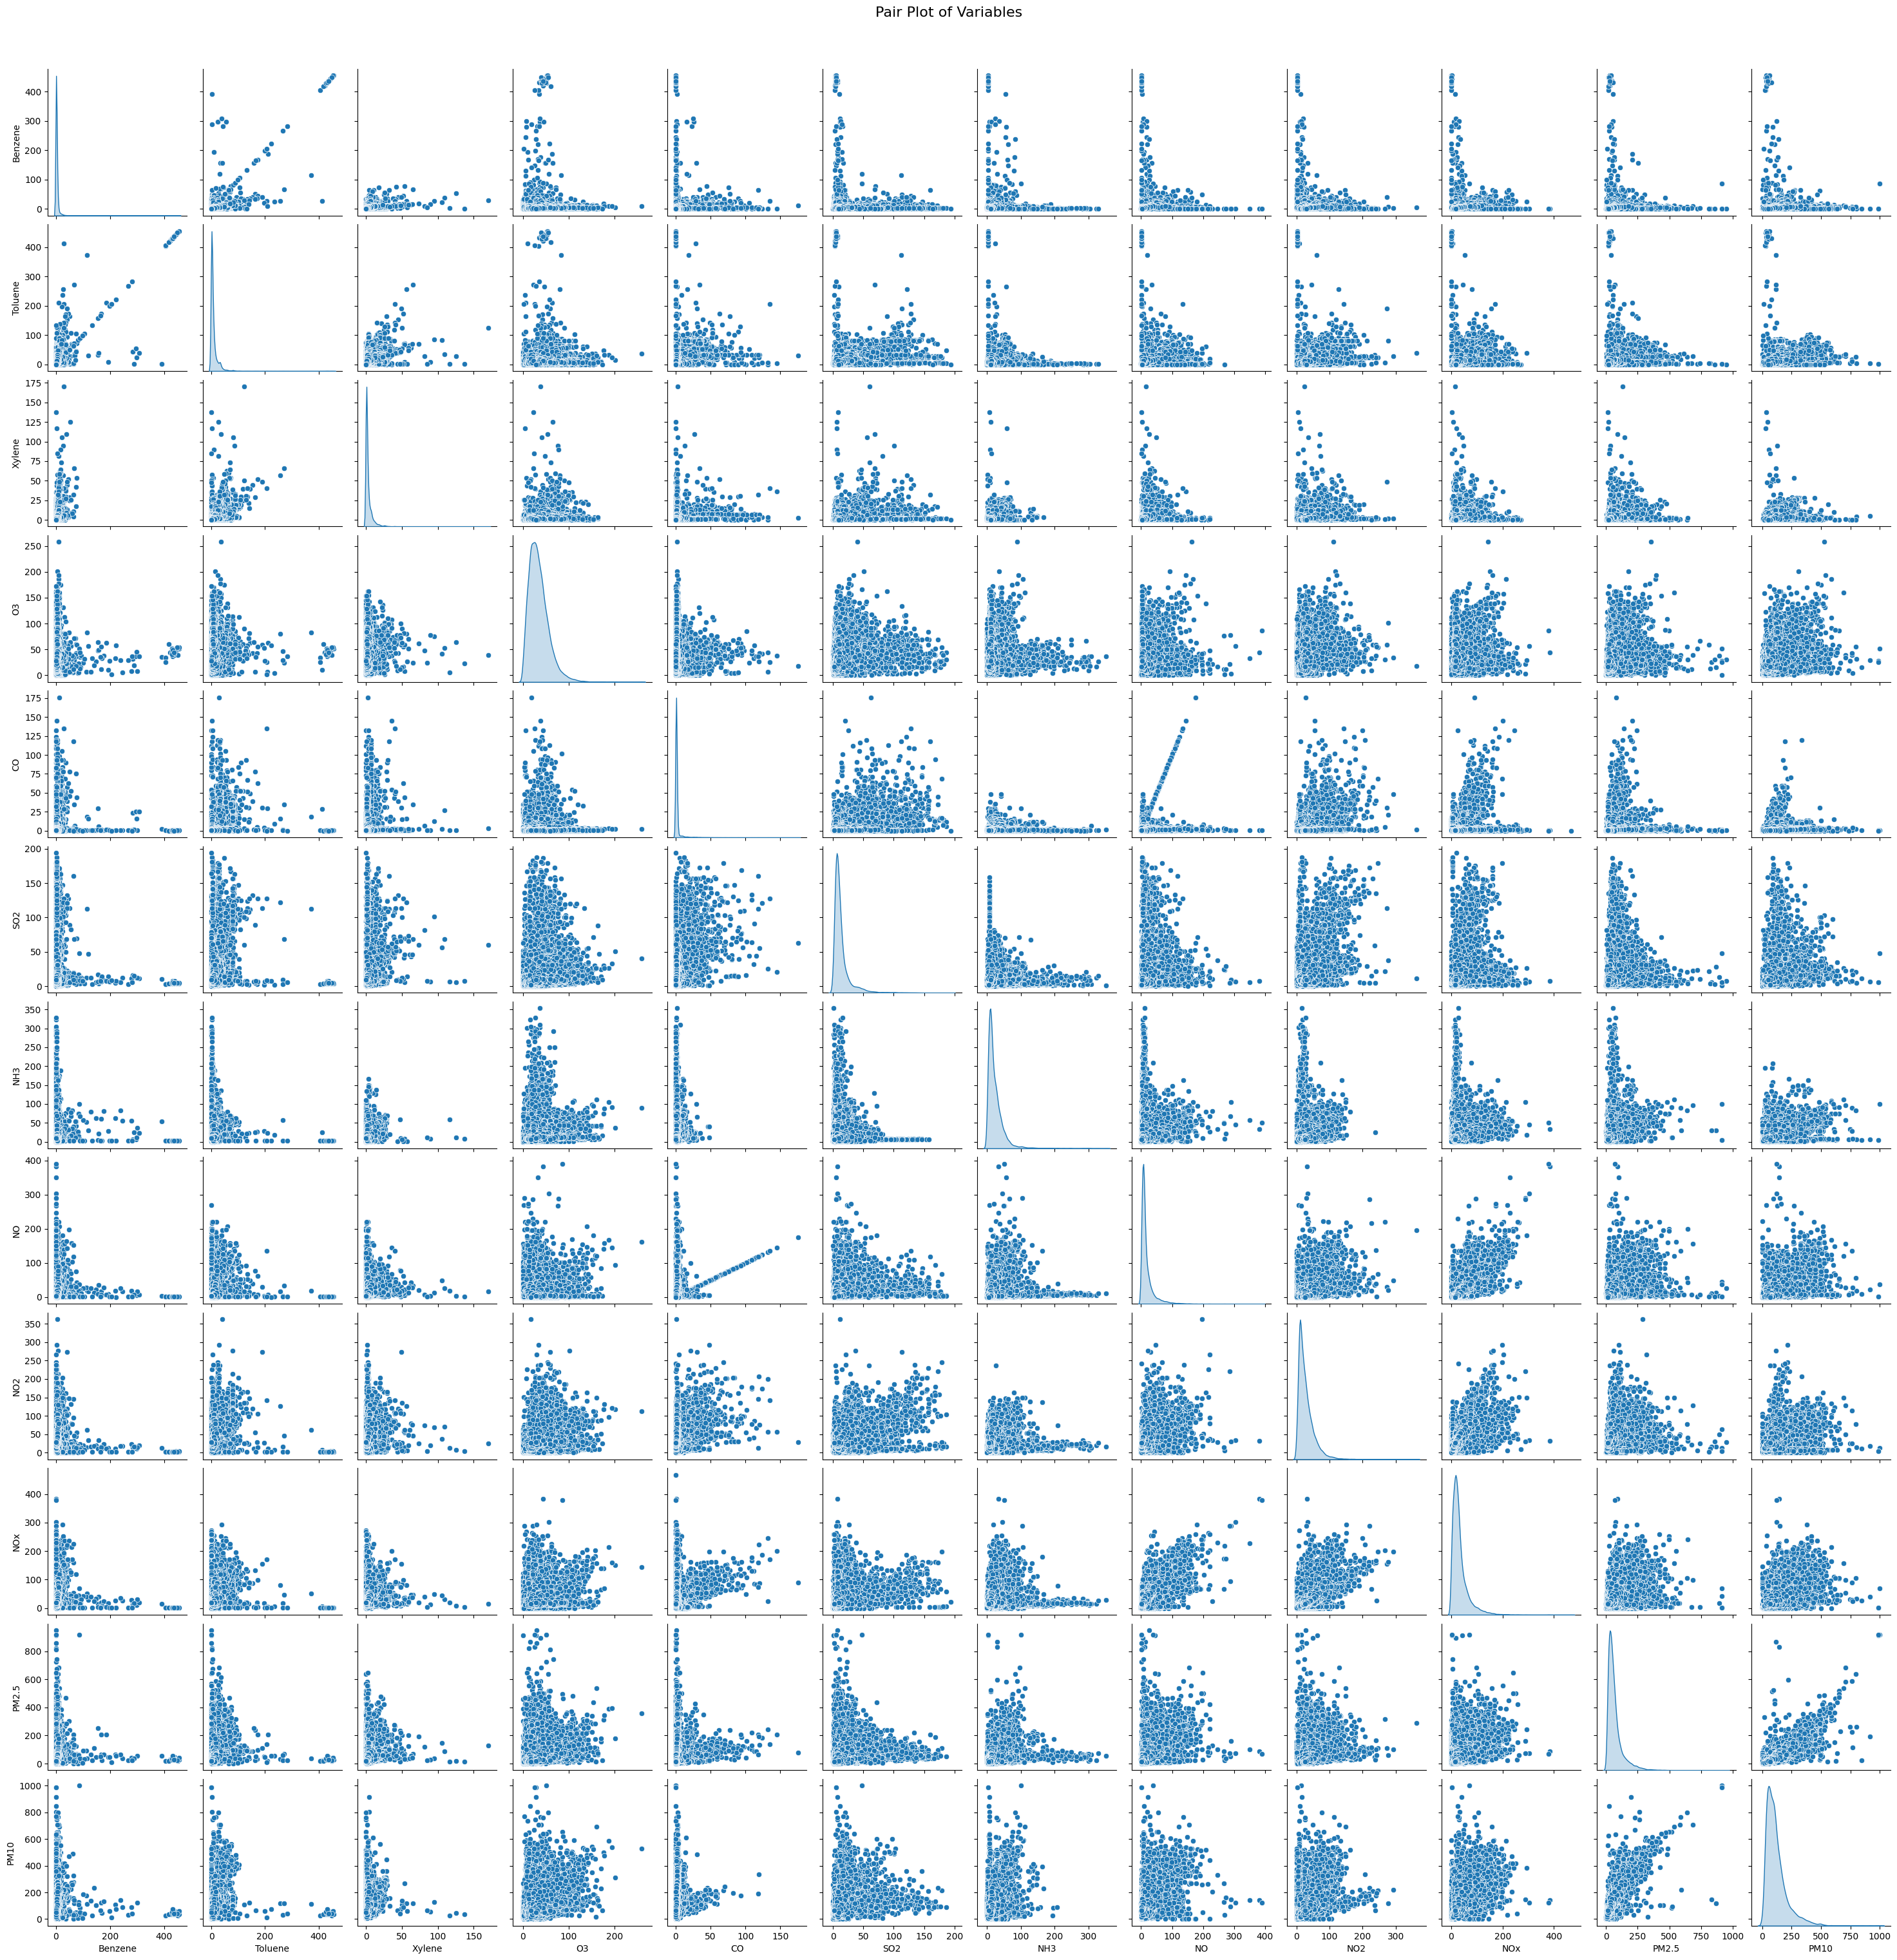

In [16]:
# Create pair plot
variables = ['Benzene', 'Toluene', 'Xylene', 'O3', 'CO', 'SO2', 'NH3', 'NO', 'NO2', 'NOx', 'PM2.5', 'PM10']
sns.pairplot(df[variables], diag_kind="kde")

# Display the plot
plt.suptitle("Pair Plot of Variables", y=1.02, fontsize=16)
plt.show()


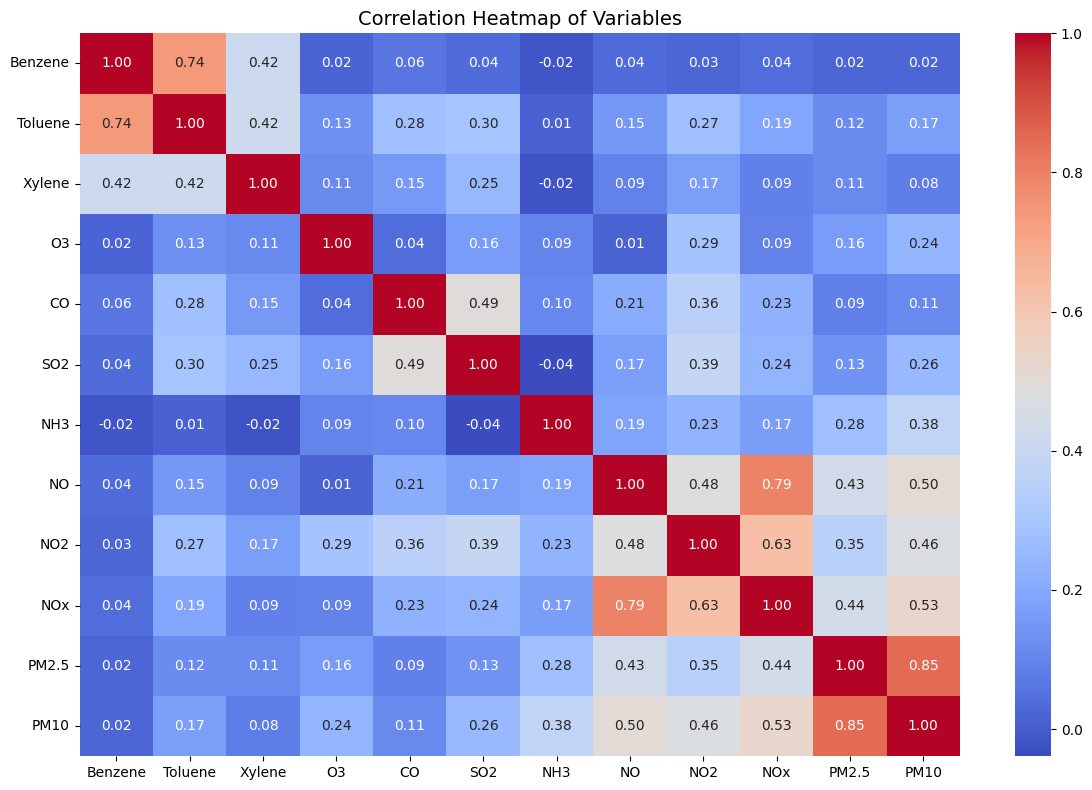

In [3]:
plt.figure(figsize=(12, 8))

variables = ['Benzene', 'Toluene', 'Xylene', 'O3', 'CO', 'SO2', 'NH3', 'NO', 'NO2', 'NOx', 'PM2.5', 'PM10']
# Compute correlation matrix and plot
corr_matrix = df[variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Variables", fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. 
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, 
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

In [25]:
df.describe().T

count        mean        std    min     25%     50%         75%  \
PM2.5    24933.0   54.975923  32.781561   0.04  28.820   48.57   80.590000   
PM10     18391.0  104.818086  60.357602   0.01  56.255   95.68  149.742500   
NO       25949.0   12.472491   8.941774   0.02   5.630    9.89   19.950000   
NO2      25946.0   25.482607  16.698364   0.01  11.750   21.69   37.620000   
NOx      25346.0   26.520383  17.876378   0.00  12.820   23.52   40.125625   
NH3      19203.0   19.661227  13.838362   0.01   8.580   15.85   30.020000   
CO       27472.0    0.952485   0.613460   0.00   0.510    0.89    1.450000   
SO2      25677.0   10.304869   5.908036   0.01   5.670    9.16   15.220000   
O3       25509.0   32.836577  17.969539   0.01  18.860   30.84   45.570000   
Benzene  23908.0    1.676408   1.786750   0.00   0.120    1.07    3.080000   
Toluene  21490.0    4.782706   4.962634   0.00   0.600    2.97    9.150000   
Xylene   11422.0    1.770984   1.954976   0.00   0.140    0.98    3.350000   
AQI      24850.0  146.932032  87.421731  13.00  81.000  118.00  208.000000   

            max  
PM2.5    158.21  
PM10     289.95  
NO        41.43  
NO2       76.40  
NOx       81.06  
NH3       62.16  
CO         2.86  
SO2       29.54  
O3        85.63  
Benzene    7.52  
Toluene   21.95  
Xylene     8.15  
AQI      398.00

<Axes: >

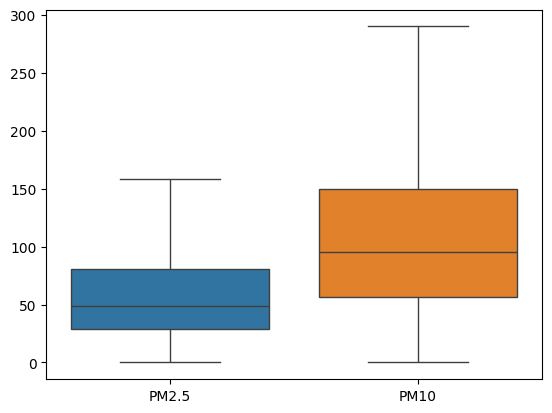

In [26]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

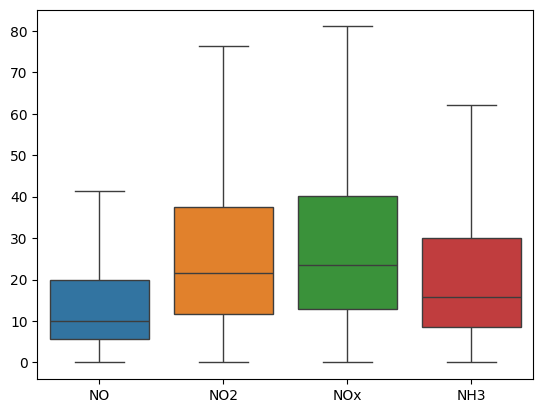

In [6]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

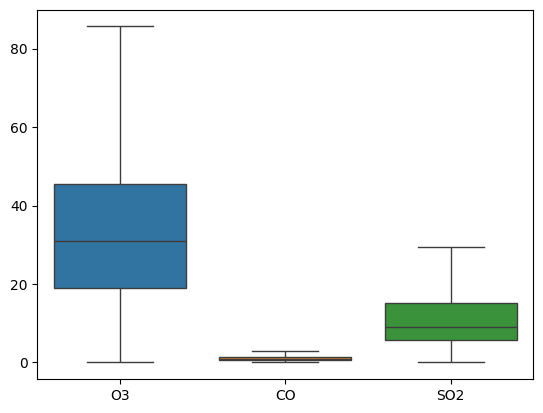

In [7]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

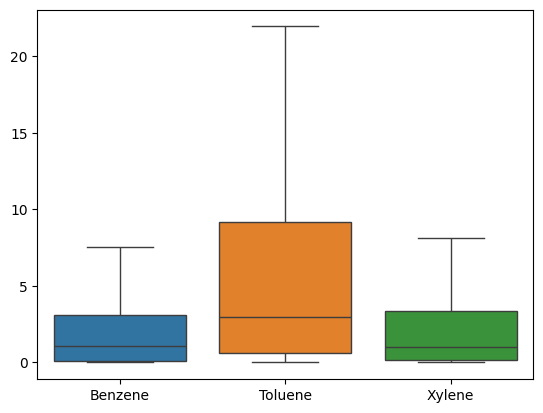

In [8]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

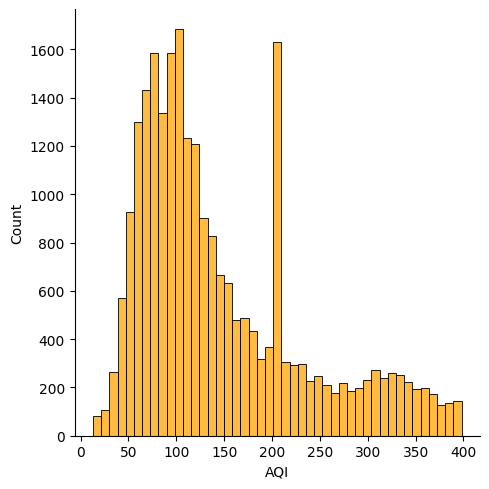

In [11]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="orange")
plt.show()

In [12]:
df1=df.drop(columns=['City'])

In [14]:
print(df1.dtypes)

Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


In [15]:
numeric_df = df1.select_dtypes(include=[np.number])

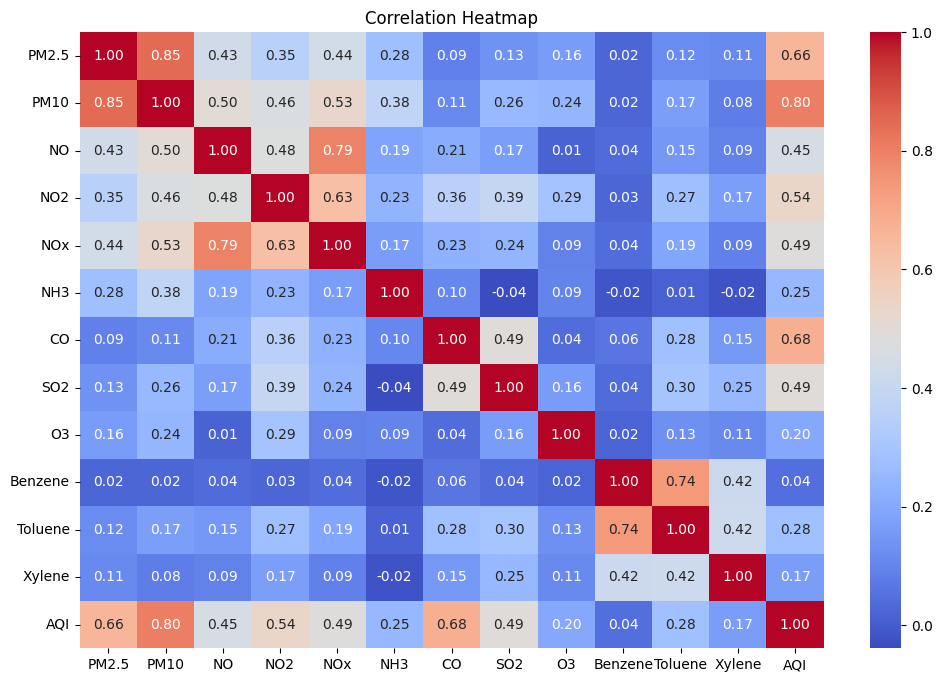

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3    CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN  0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN  0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  1.45  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN  1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  1.45  15.22   

      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  45.57     0.00     0.02    0.00  NaN        NaN  
1  34.06     3.68     5.50    3.77  NaN        NaN  
2  30.70     6.80    16.40    2.25  NaN        NaN  
3  36.08     4.43    10.14    1.00  NaN        NaN  
4  39.31     7.01    18.89    2.78  NaN        NaN

In [57]:
print(df.columns)


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


In [58]:
df.drop(['Date'], axis=1, inplace=True, errors='ignore')
df.drop(['City'], axis=1, inplace=True, errors='ignore')


In [59]:
print(df.head())  # View the first few rows


      PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0 -1.285087 -0.937353 -1.077384 -0.235186 -0.295856 -0.877186  0.053052   
1 -1.285087 -0.937353 -1.072019 -0.377908 -0.332232 -0.877186  0.131241   
2 -1.285087 -0.937353  0.691137 -0.174261  0.365757 -0.877186  0.881859   
3 -1.285087 -0.937353 -0.993680 -0.220518 -0.252628 -0.877186  1.272806   
4 -1.285087 -0.937353  1.195509 -0.054667  0.790666 -0.877186  0.881859   

        SO2        O3   Benzene   Toluene    Xylene       AQI  
0  2.868813  0.854147 -0.781278 -0.730276 -0.459521 -1.281379  
1  2.394261  0.282751  1.337126  0.426205  2.069593 -1.281379  
2  3.088428  0.115949  3.133164  2.726504  1.049897 -1.281379  
3  1.478943  0.383030  1.768866  1.405415  0.211331 -1.281379  
4  0.961389  0.543379  3.254051  3.251985  1.405449 -1.281379  


In [31]:
df

PM2.5   PM10     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
0        NaN    NaN   0.92  18.22  17.15    NaN  0.92  27.64  45.57     0.00   
1        NaN    NaN   0.97  15.69  16.46    NaN  0.97  24.55  34.06     3.68   
2        NaN    NaN  17.40  19.30  29.70    NaN  1.45  29.07  30.70     6.80   
3        NaN    NaN   1.70  18.48  17.97    NaN  1.70  18.59  36.08     4.43   
4        NaN    NaN  22.10  21.42  37.76    NaN  1.45  15.22  39.31     7.01   
...      ...    ...    ...    ...    ...    ...   ...    ...    ...      ...   
29526  15.02  50.94   7.68  25.06  19.54  12.47  0.47   8.55  23.30     2.24   
29527  24.38  74.09   3.42  26.06  16.53  11.99  0.52  12.72  30.14     0.74   
29528  22.91  65.73   3.45  29.53  18.33  10.71  0.48   8.42  30.96     0.01   
29529  16.64  49.97   4.05  29.26  18.80  10.03  0.52   9.84  28.30     0.00   
29530  15.00  66.00   0.40  26.85  14.05   5.20  0.59   2.10  17.05      NaN   

       Toluene  Xylene   AQI    AQI_Bucket  
0         0.02    0.00   NaN           NaN  
1         5.50    3.77   NaN           NaN  
2        16.40    2.25   NaN           NaN  
3        10.14    1.00   NaN           NaN  
4        18.89    2.78   NaN           NaN  
...        ...     ...   ...           ...  
29526    12.07    0.73  41.0          Good  
29527     2.21    0.38  70.0  Satisfactory  
29528     0.01    0.00  68.0  Satisfactory  
29529     0.00    0.00  54.0  Satisfactory  
29530      NaN     NaN  50.0          Good  

[29531 rows x 14 columns]

In [32]:
print(df.dtypes)

PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


In [33]:
df = pd.get_dummies(df, drop_first=True)

In [34]:
df = df.select_dtypes(include=[np.number])

In [35]:
df = df.fillna(0)  # Replace NaN with 0 (or choose an appropriate strategy)

In [36]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)

In [37]:
df1

array([[-1.28508706, -0.93735315, -1.07738425, ..., -0.73027586,
        -0.45952139, -1.28137872],
       [-1.28508706, -0.93735315, -1.07201859, ...,  0.42620488,
         2.06959273, -1.28137872],
       [-1.28508706, -0.93735315,  0.69113732, ...,  2.72650418,
         1.04989685, -1.28137872],
       ...,
       [-0.6507958 ,  0.00649789, -0.80588185, ..., -0.73238623,
        -0.45952139, -0.57665045],
       [-0.82438839, -0.21980809, -0.74149393, ..., -0.7344966 ,
        -0.45952139, -0.72174156],
       [-0.86979379,  0.01037496, -1.13318712, ..., -0.7344966 ,
        -0.45952139, -0.76319616]])

In [38]:
df = pd.DataFrame(df1,columns = df.columns)

In [39]:
df

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0     -1.285087 -0.937353 -1.077384 -0.235186 -0.295856 -0.877186  0.053052   
1     -1.285087 -0.937353 -1.072019 -0.377908 -0.332232 -0.877186  0.131241   
2     -1.285087 -0.937353  0.691137 -0.174261  0.365757 -0.877186  0.881859   
3     -1.285087 -0.937353 -0.993680 -0.220518 -0.252628 -0.877186  1.272806   
4     -1.285087 -0.937353  1.195509 -0.054667  0.790666 -0.877186  0.881859   
...         ...       ...       ...       ...       ...       ...       ...   
29526 -0.869240 -0.205879 -0.351947  0.150672 -0.169860 -0.021614 -0.650652   
29527 -0.610097  0.126543 -0.809101  0.207084 -0.328542 -0.054547 -0.572463   
29528 -0.650796  0.006498 -0.805882  0.402834 -0.233649 -0.142368 -0.635014   
29529 -0.824388 -0.219808 -0.741494  0.387602 -0.208871 -0.189023 -0.572463   
29530 -0.869794  0.010375 -1.133187  0.251650 -0.459283 -0.520412 -0.462998   

            SO2        O3   Benzene   Toluene    Xylene       AQI  
0      2.868813  0.854147 -0.781278 -0.730276 -0.459521 -1.281379  
1      2.394261  0.282751  1.337126  0.426205  2.069593 -1.281379  
2      3.088428  0.115949  3.133164  2.726504  1.049897 -1.281379  
3      1.478943  0.383030  1.768866  1.405415  0.211331 -1.281379  
4      0.961389  0.543379  3.254051  3.251985  1.405449 -1.281379  
...         ...       ...       ...       ...       ...       ...  
29526 -0.062968 -0.251413  0.508185  1.812716  0.030201 -0.856469  
29527  0.577447  0.088148 -0.355295 -0.268106 -0.204597 -0.555923  
29528 -0.082933  0.128856 -0.775522 -0.732386 -0.459521 -0.576650  
29529  0.135146 -0.003196 -0.781278 -0.734497 -0.459521 -0.721742  
29530 -1.053539 -0.561684 -0.781278 -0.734497 -0.459521 -0.763196  

[29531 rows x 13 columns]

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [41]:
# Data Preparation for Modeling
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [42]:
x.head()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0 -1.285087 -0.937353 -1.077384 -0.235186 -0.295856 -0.877186  0.053052   
1 -1.285087 -0.937353 -1.072019 -0.377908 -0.332232 -0.877186  0.131241   
2 -1.285087 -0.937353  0.691137 -0.174261  0.365757 -0.877186  0.881859   
3 -1.285087 -0.937353 -0.993680 -0.220518 -0.252628 -0.877186  1.272806   
4 -1.285087 -0.937353  1.195509 -0.054667  0.790666 -0.877186  0.881859   

        SO2        O3   Benzene   Toluene    Xylene  
0  2.868813  0.854147 -0.781278 -0.730276 -0.459521  
1  2.394261  0.282751  1.337126  0.426205  2.069593  
2  3.088428  0.115949  3.133164  2.726504  1.049897  
3  1.478943  0.383030  1.768866  1.405415  0.211331  
4  0.961389  0.543379  3.254051  3.251985  1.405449

In [43]:
y.head()

0   -1.281379
1   -1.281379
2   -1.281379
3   -1.281379
4   -1.281379
Name: AQI, dtype: float64

In [44]:
x.tail()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
29526 -0.869240 -0.205879 -0.351947  0.150672 -0.169860 -0.021614 -0.650652   
29527 -0.610097  0.126543 -0.809101  0.207084 -0.328542 -0.054547 -0.572463   
29528 -0.650796  0.006498 -0.805882  0.402834 -0.233649 -0.142368 -0.635014   
29529 -0.824388 -0.219808 -0.741494  0.387602 -0.208871 -0.189023 -0.572463   
29530 -0.869794  0.010375 -1.133187  0.251650 -0.459283 -0.520412 -0.462998   

            SO2        O3   Benzene   Toluene    Xylene  
29526 -0.062968 -0.251413  0.508185  1.812716  0.030201  
29527  0.577447  0.088148 -0.355295 -0.268106 -0.204597  
29528 -0.082933  0.128856 -0.775522 -0.732386 -0.459521  
29529  0.135146 -0.003196 -0.781278 -0.734497 -0.459521  
29530 -1.053539 -0.561684 -0.781278 -0.734497 -0.459521

In [45]:
y.tail()

29526   -0.856469
29527   -0.555923
29528   -0.576650
29529   -0.721742
29530   -0.763196
Name: AQI, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=70)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(23624, 12) (5907, 12) (23624,) (5907,)


In [47]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=70)
print("Train shapes:", X_train.shape, Y_train.shape)
print("Test shapes:", X_test.shape, Y_test.shape)


Train shapes: (23624, 12) (23624,)
Test shapes: (5907, 12) (5907,)


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data scaled successfully.")


Data scaled successfully.


In [49]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [50]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.62916849  0.04019111  0.06866356  0.04969658 -0.0311025  -0.03419073
  0.15889163  0.05138807  0.02158326  0.02616245  0.05032714 -0.03889683]
Intercept: 0.004388720764388096


In [51]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Display the first few predictions
print("Train predictions:", train_pred[:5])
print("Test predictions:", test_pred[:5])


Train predictions: [ 0.69559011  1.54182862 -0.89555926 -0.64370298  0.2697372 ]
Test predictions: [-1.27702932 -0.50464554 -0.6540025   0.87895573  0.58987494]


In [52]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming `train_pred` and `test_pred` are defined predictions from the model
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))

print("RMSE Training Data = ", RMSE_train)
print("RMSE Test Data = ", RMSE_test)
print('-' * 50)

# R-squared values
print('R-squared value on train:', model.score(X_train, Y_train))
print('R-squared value on test:', model.score(X_test, Y_test))


RMSE Training Data =  0.5693317533372709
RMSE Test Data =  0.5599756456215133
--------------------------------------------------
R-squared value on train: 0.6794504605402191
R-squared value on test: 0.6715950545681411


In [54]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-validation scores: [0.56618223 0.7182546  0.62245891 0.67684323 0.65635195]
Mean CV Accuracy: 0.65


In [55]:
# Predict on the test set
Y_pred = model.predict(X_test)

print("Predictions made successfully.")


Predictions made successfully.


In [56]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [66]:
#predicting train
train_pred=model.predict(X_train)
#predicting on testimport numpy as np
from sklearn.metrics import mean_squared_error

# Assuming `train_pred` and `test_pred` are the model's predictions on train and test sets
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))

print("RMSE Training Data =", str(RMSE_train))
print("RMSE Test Data =", str(RMSE_test))
print('-' * 50)
print('R-Squared value on train:', model.score(X_train, Y_train))
print('R-Squared value on test:', model.score(X_test, Y_test))

test_pred=model.predict(X_test)

RMSE Training Data = 0.5693317533372709
RMSE Test Data = 0.5599756456215133
--------------------------------------------------
R-Squared value on train: 0.6794504605402191
R-Squared value on test: 0.6715950545681411


In [67]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [68]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training and testing data
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_preds))
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_preds))

# Print RMSE values
print("RMSE Training Data =", str(RMSE_train))
print("RMSE Test Data =", str(RMSE_test))
print('-' * 50)

# Print R² values
print('R-Squared value on train:', DT.score(X_train, Y_train))
print('R-Squared value on test:', DT.score(X_test, Y_test))


RMSE Training Data = 0.050256405721283905
RMSE Test Data = 0.5829577412125262
--------------------------------------------------
R-Squared value on train: 0.9975022601963515
R-Squared value on test: 0.6440856014854359


In [44]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming `RF` is a trained Random Forest model
# Generate predictions
train_preds1 = RF.predict(X_train)
test_preds1 = RF.predict(X_test)

# Calculate RMSE
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_preds1))
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_preds1))

# Print results
print("RMSE on Training Data:", RMSE_train)
print("RMSE on Testing Data:", RMSE_test)
print('-' * 50)

# Calculate and print R-squared values
print("R-squared value on Train:", RF.score(X_train, Y_train))
print("R-squared value on Test:", RF.score(X_test, Y_test))


RMSE on Training Data: 0.1415033054882244
RMSE on Testing Data: 0.374252148812715
--------------------------------------------------
R-squared value on Train: 0.9799161041593577
R-squared value on Test: 0.8616071267271216
